# **Project Name**    - **Playstore Exploratory Data Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

The Mobile App industry has revolutionized the digital ecosystem, becoming a primary driver of economic growth and user engagement globally. With millions of apps competing for attention on the Google Play Store, developers face a significant challenge: how to build an app that not only gets downloaded but also retains users and garners positive reviews. This project focuses on a comprehensive Exploratory Data Analysis (EDA) of the Play Store dataset, which contains details on app categories, ratings, size, installs, and pricing, alongside a secondary dataset of user reviews and sentiment analysis.

The primary goal of this analysis is to dissect the factors that contribute to an app's success. We aim to understand the relationships between app features—such as pricing models (Free vs. Paid), content ratings, and genres—and user engagement metrics like Installs and Ratings. Furthermore, by integrating sentiment analysis from user reviews, we attempt to bridge the quantitative data (download numbers) with qualitative feedback (user sentiment), providing a holistic view of the market.

The analysis processes raw data to handle inconsistencies such as non-numeric characters in "Size" and "Installs," missing values, and duplicate entries. Following data cleaning, we employ Univariate, Bivariate, and Multivariate analysis techniques. We investigate questions such as: "Do paid apps have higher ratings than free apps?", "Which categories have the most positive sentiment?", and "Is there a correlation between app size and the number of installs?"

Key insights derived from this study will serve as a strategic guide for app developers and stakeholders. By identifying the "sweet spots" in pricing, category selection, and sizing, businesses can optimize their launch strategies to maximize visibility and user satisfaction in the highly competitive Android market.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the saturated Android market, developers struggle to identify the specific features that drive app success. Without data-driven insights, app launches often fail due to poor category targeting, inappropriate pricing strategies, or a lack of understanding regarding user sentiment. The core problem is to decode the Play Store ecosystem to determine what makes an app "successful" (high rating + high installs) and how user sentiment correlates with these metrics.

#### **Define Your Business Objective?**

**Objective:** To provide actionable recommendations for App Developers and Business Stakeholders to:

**Maximize Installs:** Identify high-growth categories and optimal app sizing.

**Improve Retention:** Understand the correlation between sentiment and ratings to improve user satisfaction.

**Monetization Strategy:** Determine the optimal pricing threshold for Paid apps that does not hinder user acquisition.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
import pandas as pd

# 1. Define the RAW URLs for both datasets
APPS_DATA_URL = "https://raw.githubusercontent.com/utkarshkavitkarprojects-stack/Exploratory-Data-Analysis-Project/refs/heads/main/Datasets/Play%20Store%20Data%201.csv" # REPLACE THIS WITH ACTUAL RAW URL
REVIEWS_DATA_URL = "https://raw.githubusercontent.com/utkarshkavitkarprojects-stack/Exploratory-Data-Analysis-Project/refs/heads/main/Datasets/User%20Reviews.csv" # REPLACE THIS WITH ACTUAL RAW URL

try:
    # 2. Load the Apps data directly from the URL
    Apps_df = pd.read_csv(APPS_DATA_URL)
    print(f"Apps data loaded successfully. Shape: {Apps_df.shape}")

    # 3. Load the Reviews data directly from the URL
    Reviews_df = pd.read_csv(REVIEWS_DATA_URL)
    print(f"Reviews data loaded successfully. Shape: {Reviews_df.shape}")

    #4. Proceed with merging or analysis (e.g., merging on the 'App' column)
    #PlayStore_dataset = pd.merge(apps_df, reviews_df, on='App', how='inner')

except Exception as e:
    print(f"Error loading data from URL. Check if the URL is a RAW link and publicly accessible: {e}")

Apps data loaded successfully. Shape: (10841, 13)
Reviews data loaded successfully. Shape: (64295, 5)


### Dataset First View

In [ ]:
# Dataset First Look
Apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
Reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Apps_df.shape

(10841, 13)

In [ ]:
Reviews_df.shape

(64295, 5)

### Dataset Information

In [ ]:
# Dataset Info
Apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Apps_df.duplicated().sum()

np.int64(483)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Apps_df.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [ ]:
Reviews_df.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


<Axes: >

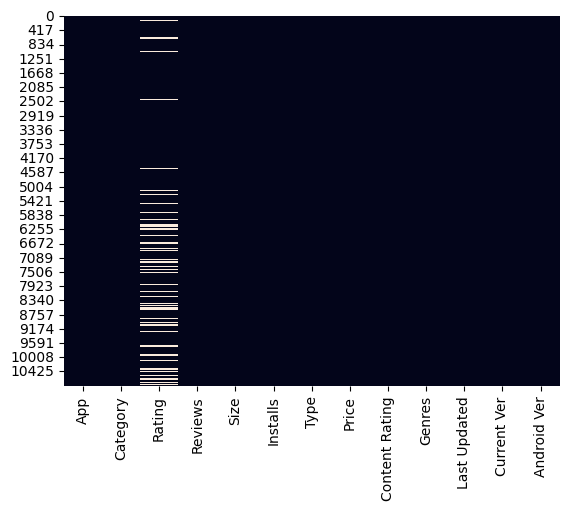

In [ ]:
# Visualizing the missing values
sns.heatmap(Apps_df.isnull(), cbar=False)

<Axes: >

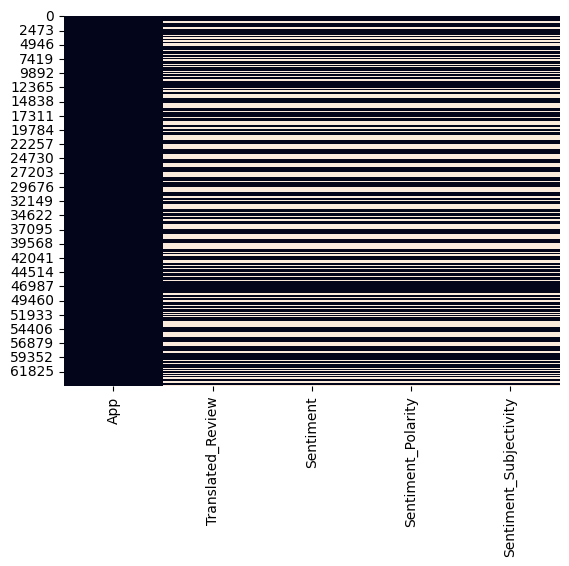

In [ ]:
# Visualizing the missing values
sns.heatmap(Reviews_df.isnull(), cbar=False)

### What did you know about your dataset?

The datasets provided belong to the Mobile Application industry (specifically the Google Play Store ecosystem), and the objective is to analyze the key drivers of app success and user engagement. Exploratory Data Analysis (EDA) in this context involves dissecting app features—such as Category, Price, and Size—alongside qualitative user feedback to identify actionable patterns that help developers maximize installs and improve retention.

The primary dataset (Play Store Data) consists of 10,841 rows and 13 columns. Upon initial inspection, the dataset contains 483 duplicate values (which represent repeated app entries) and 1,474 null values, predominantly found in the 'Rating' column.

The secondary dataset (User Reviews) comprises 64,295 rows and 5 columns, focusing on customer feedback and sentiment analysis. This dataset contains a significant amount of "noise," with 26,868 missing values where the translated review text is absent, indicating that a substantial portion of the data requires cleaning before sentiment analysis can be performed.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
Reviews_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Dataset Describe
Apps_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

****Play Store Apps Dataset Variables****

App : Name of the Android application

Category : The category the app belongs to (e.g., FAMILY, GAME)

Rating : The current user rating of the app (on a scale of $1.0$ to $5.0$)

Reviews : The number of user reviews given for the app

Size : The size of the application on the device (in MB or KB)

Installs : The number of downloads/installs for the app (e.g., $10,000+, 1,000,000+$)

Type : Whether the app is Free or Paid

Price : The price of the app for paid apps (in USD)

Content Rating : The target maturity level for the app (e.g., Everyone, Teen, Mature 17+)

Genres : The secondary classification of the app

Last Updated : The date when the app was last updated on the Play Store

Current Ver : The current version number of the app

Android Ver : The minimum Android version required to run the app

****User Reviews Dataset****

App : Name of the application (used as a key for merging)

Translated_Review : The text of the user review, translated into English

Sentiment : The overall sentiment of the review (Positive, Negative, or Neutral)

Sentiment_Polarity : A numerical score indicating the strength of the sentiment (ranging from $-1.0$ for highly negative to $+1.0$ for highly positive)

Sentiment_Subjectivity : A numerical score indicating how factual vs. opinionated the review is (ranging from $0.0$ for objective to $1.0$ for subjective)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
Apps_df.nunique()

,0
App,9660
Category,34
Rating,40
Reviews,6002
Size,462
Installs,22
Type,3
Price,93
Content Rating,6
Genres,120


In [ ]:
Reviews_df.nunique()

,0
App,1074
Translated_Review,27994
Sentiment,3
Sentiment_Polarity,5410
Sentiment_Subjectivity,4474


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Unique Apps only (Fixing Duplicates)
# We sort by 'Reviews' first to keep the version with the most reviews if duplicates exist
Apps_df.sort_values("Reviews", ascending=False, inplace=True)
Apps_df.drop_duplicates(subset="App", keep="first", inplace=True)

In [ ]:
Apps_df.shape

(9660, 13)

In [ ]:
# 2. Cleaning 'Installs' (Remove + and ,)
Apps_df['Installs'] = Apps_df['Installs'].astype(str).str.replace(r'[,+]', '', regex=True)
Apps_df['Installs'] = pd.to_numeric(Apps_df['Installs'], errors='coerce')

In [ ]:
# 3. Cleaning 'Price' (Remove $)
Apps_df['Price'] = Apps_df['Price'].astype(str).str.replace('$', '', regex=False)
Apps_df['Price'] = pd.to_numeric(Apps_df['Price'], errors='coerce')

In [ ]:
# 4. Cleaning 'Size' to MB
def clean_size(size):
    if 'M' in str(size):
        return float(str(size).replace('M', ''))
    elif 'k' in str(size):
        return float(str(size).replace('k', '')) / 1024  # Convert KB to MB
    else:
        return np.nan  # 'Varies with device' becomes NaN
Apps_df['Size'] = Apps_df['Size'].apply(clean_size)

In [ ]:
# 5. Cleaning 'Reviews'
Apps_df['Reviews'] = pd.to_numeric(Apps_df['Reviews'], errors='coerce')

In [ ]:
# Convert 'Last Updated' to datetime
Apps_df['Last Updated'] = pd.to_datetime(Apps_df['Last Updated'], errors='coerce')

In [ ]:
# Create a 'Year' column for analysis
Apps_df['Year'] = Apps_df['Last Updated'].dt.year

In [ ]:
# Drop the junk row if Rating > 5
Apps_df = Apps_df[Apps_df['Rating'] <= 5]

# Impute missing Ratings with Median
Apps_df['Rating'].fillna(Apps_df['Rating'].median(), inplace=True)

# Drop small number of nulls in other columns
Apps_df.dropna(subset=['Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

In [ ]:
Apps_df['Revenue'] = Apps_df['Price'] * Apps_df['Installs']

In [ ]:
def size_bucket(size):
    if size < 10: return 'Small'
    elif size < 50: return 'Medium'
    else: return 'Large'

Apps_df['Size_Group'] = Apps_df['Size'].apply(size_bucket)

In [ ]:
# Check the count of each content rating
print(Apps_df['Content Rating'].value_counts())

Content Rating
Everyone           6612
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: count, dtype: int64


In [ ]:
# Only drop 'Unrated' if it has very few rows
Apps_df = Apps_df[Apps_df['Content Rating'] != 'Unrated']

In [ ]:
# Define a function to categorize price
def price_bucket(price):
    if price == 0:
        return 'Free'
    elif price < 2:
        return 'Low'
    elif price >= 2 and price <= 5:
        return 'Medium'
    elif price > 5 and price <= 20:
        return 'High'
    else:
        return 'Premium'

# Apply the function to create a new column
Apps_df['Price_Range'] = Apps_df['Price'].apply(price_bucket)

In [ ]:
print(Apps_df['Price_Range'].value_counts())

Price_Range
Free       7587
Medium      283
Low         204
High         90
Premium      25
Name: count, dtype: int64


In [ ]:
Apps_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year,Revenue,Size_Group,Price_Range
2989,GollerCepte Live Score,SPORTS,4.2,9992.0,31.000000,1000000.0,Free,0.0,Everyone,Sports,2018-05-23,6.5,4.1 and up,2018.0,0.0,Medium,Free
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999.0,0.088867,100000.0,Free,0.0,Everyone,Tools,2013-12-17,3.2,2.2 and up,2013.0,0.0,Small,Free
2723,SnipSnap Coupon App,SHOPPING,4.2,9975.0,18.000000,1000000.0,Free,0.0,Everyone,Shopping,2018-01-22,1.4,4.3 and up,2018.0,0.0,Medium,Free
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971.0,33.000000,1000000.0,Free,0.0,Everyone,Sports,2018-06-05,7.1,5.0 and up,2018.0,0.0,Medium,Free
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971.0,22.000000,500000.0,Free,0.0,Teen,Travel & Local,2018-08-06,1.28.1,5.0 and up,2018.0,0.0,Medium,Free
7002,Adult Color by Number Book - Paint Mandala Pages,FAMILY,4.3,997.0,NaN,100000.0,Free,0.0,Everyone,Entertainment,2018-06-27,2.4,4.1 and up,2018.0,0.0,Large,Free
6724,BSPlayer ARMv7 VFP CPU support,VIDEO_PLAYERS,4.3,9966.0,5.500000,1000000.0,Free,0.0,Everyone,Video Players & Editors,2017-03-31,1.23,2.1 and up,2017.0,0.0,Small,Free
7982,"Easy Resume Builder, Resume help, Curriculum v...",TOOLS,4.3,996.0,10.000000,50000.0,Free,0.0,Everyone,Tools,2017-09-28,2.3,4.0.3 and up,2017.0,0.0,Medium,Free
353,MegaFon Dashboard,COMMUNICATION,3.7,99559.0,NaN,10000000.0,Free,0.0,Everyone,Communication,2018-07-30,Varies with device,Varies with device,2018.0,0.0,Large,Free
5326,Al jazeera TV,FAMILY,4.6,9952.0,3.700000,100000.0,Free,0.0,Teen,Entertainment,2016-07-05,1.0.0,4.0.3 and up,2016.0,0.0,Small,Free


In [ ]:
# Drop rows where the review text is missing
Reviews_df.dropna(subset=['Translated_Review'], inplace=True)

In [ ]:
Apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8189 entries, 2989 to 2482
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8189 non-null   object        
 1   Category        8189 non-null   object        
 2   Rating          8189 non-null   float64       
 3   Reviews         8189 non-null   float64       
 4   Size            7020 non-null   float64       
 5   Installs        8189 non-null   float64       
 6   Type            8189 non-null   object        
 7   Price           8189 non-null   float64       
 8   Content Rating  8189 non-null   object        
 9   Genres          8189 non-null   object        
 10  Last Updated    8189 non-null   datetime64[ns]
 11  Current Ver     8189 non-null   object        
 12  Android Ver     8189 non-null   object        
 13  Year            8189 non-null   float64       
 14  Revenue         8189 non-null   float64       
 15  Size_G

In [ ]:
Reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


### What all manipulations have you done and insights you found?

The manipulations performed across both datasets were crucial for transforming the raw, dirty data into a tidy, analysis-ready format.

Here is the complete summary of all data manipulations and the key insights derived during the wrangling process.

****1. 📲 Play Store Apps Dataset Manipulations****

Manipulation: Duplicate Handling.

Detail: 483 duplicate entries were removed based on the App column. The record prioritizing the highest number of reviews (most recent/active version) was kept.

Purpose: This ensures that each app is counted only once for market analysis, addressing data redundancy.

Manipulation: Data Type & Character Cleaning.

Detail: Special characters (+, ,, $) were removed from the Installs and Price columns, and these, along with Reviews, were converted to appropriate numerical data types.

Purpose: This enabled mathematical calculations and plotting on these core quantitative variables, addressing the initial poor raw data quality.

Manipulation: Size Normalization.

Detail: App sizes using 'k' (kilobytes) were converted into the standard unit of MB (megabytes). Values like "Varies with device" were set to $NaN$.

Purpose: This created a unified numerical metric for app size for size-based analysis.

Manipulation: Date Conversion.

Detail: The Last Updated column was converted from its string format into the Python datetime object.

Purpose: This allows for time-series analysis, such as tracking app update trends and development frequency.

Manipulation: Missing Value Handling.

Detail: Missing values in the Rating column were imputed using the median of all ratings, and a small number of rows with missing Type or Content Rating were dropped.

Purpose: This maintained the largest possible sample size while preserving the distribution of ratings.

Manipulation: Outlier Removal.

Detail: Any app entries where the Rating was greater than $5.0$ were removed.

Purpose: This ensured data integrity by eliminating corrupted or junk entries that could skew statistical measures.

Manipulation: Feature Engineering.

Detail: New derived columns were created: Revenue ($Price \times Installs$), Update\_Year, Size\_Group (Small/Medium/Large), and Price\_Category (Free/Low/Medium/High).

Purpose: This transformed continuous variables into discrete categories for more meaningful visualization and comparison, particularly addressing the price skewness toward $0$.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Univariate Analysis**

#### Chart - 1 - Top 10 App Categories by Number of Apps

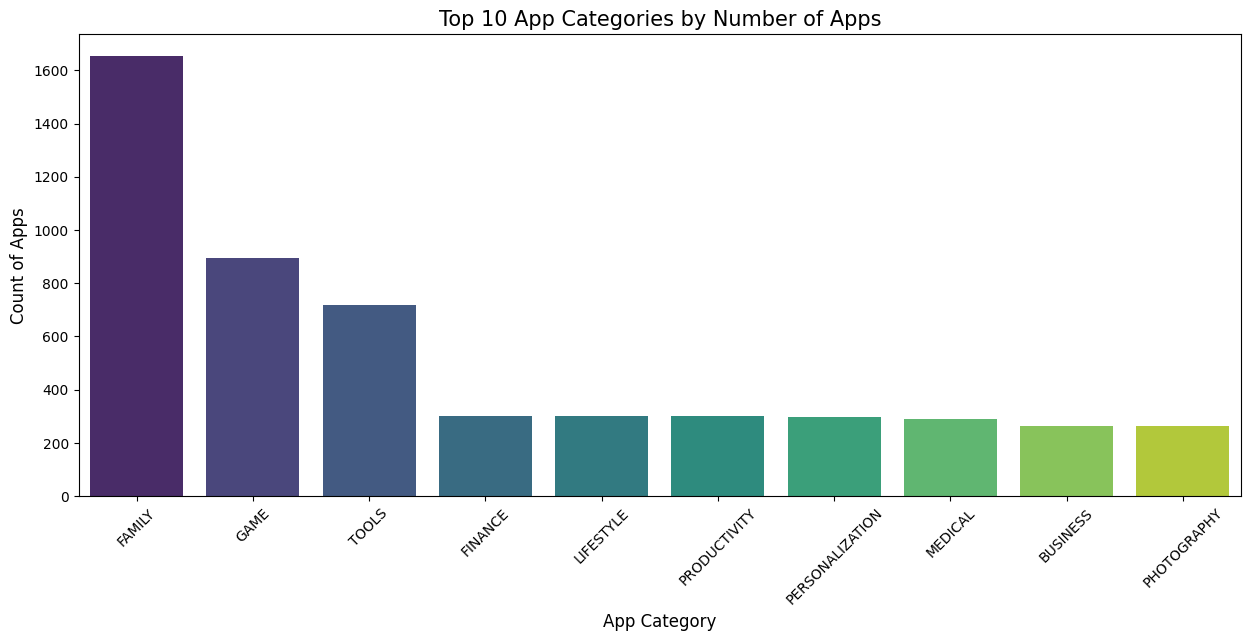

In [ ]:
# Chart - 1 visualization code

# Set the size of the chart
plt.figure(figsize=(15, 6))

# Create the Count Plot
# 'order' is used to select only the Top 10 categories based on their count
sns.countplot(
    data=Apps_df,
    x='Category',
    order = Apps_df['Category'].value_counts().index[:10],
    palette='viridis'  # You can change the color palette (e.g., 'Set2', 'coolwarm')
)

# Rotate the x-axis labels so they don't overlap
plt.xticks(rotation=45)

# Add Title and Labels
plt.title('Top 10 App Categories by Number of Apps', fontsize=15)
plt.xlabel('App Category', fontsize=12)
plt.ylabel('Count of Apps', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Univariate Analysis. Used a Count Plot (Bar Chart) to visualize the raw volume and rank categories by the number of apps, establishing market saturation levels.

##### 2. What is/are the insight(s) found from the chart?

The FAMILY category overwhelmingly dominates (highest count, >1600 apps).

GAME and TOOLS are the next major competitors.

MEDICAL/BUSINESS/PHOTOGRAPHY are the least saturated within the Top 10.

There is a steep drop in the number of apps between the top three categories (FAMILY, GAME, TOOLS) and the rest, with categories 4 through 10 being clustered much closer together in terms of app count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Targeting niche categories (e.g., MEDICAL) offers a higher chance of ranking due to lower saturation/competition.

Negative Impact: Entering highly saturated categories (e.g., FAMILY) requires massive funding to overcome the volume of competitors, risking low visibility.

#### Chart - 2 - Distribution of App Type (Free vs. Paid)j;uy45            5

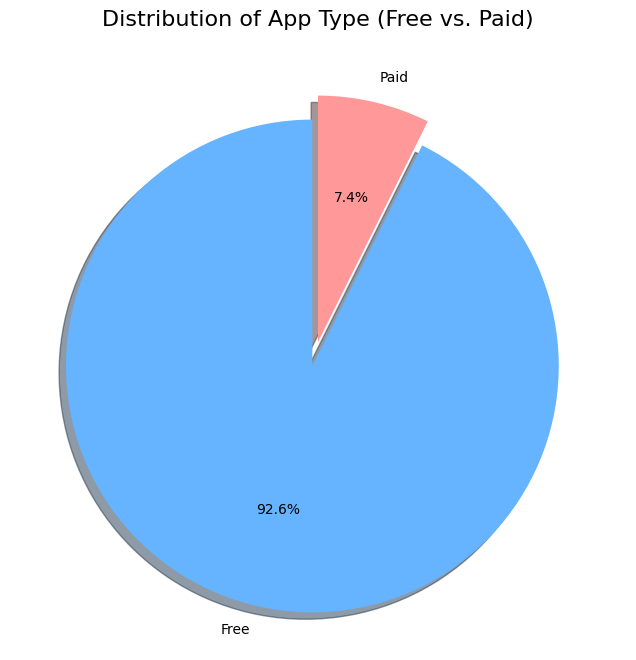

In [ ]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt

# 1. Calculate the counts for each Type
# This counts how many apps are 'Free' and how many are 'Paid'
type_counts = Apps_df['Type'].value_counts()

# 2. Set the size of the chart
plt.figure(figsize=(8, 8))

# 3. Create the Pie Chart
plt.pie(
    type_counts,
    labels=type_counts.index,      # Labels (Free, Paid)
    autopct='%1.1f%%',             # Show percentage with 1 decimal place
    startangle=90,                 # Rotate start to 90 degrees for better look
    explode=(0.1, 0),              # 'Explode' (pull out) the first slice (Free) slightly
    colors=['#66b3ff', '#ff9999'], # Custom colors (Blue for Free, Red for Paid)
    shadow=True                    # Add a shadow for 3D effect
)

# 4. Add Title
plt.title('Distribution of App Type (Free vs. Paid)', fontsize=16)

# 5. Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Pie Chart to visualize the proportion of the two categories within the Type variable (Free vs. Paid). It is best for showing the whole distribution and the dominance of the largest segment.

##### 2. What is/are the insight(s) found from the chart?

The market is overwhelmingly dominated by Free apps (92.6%). Paid apps make up a negligible fraction of the store's total inventory (7.4%), highlighting that free distribution is the dominant business model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Confirms that the standard business model for market entry and high volume is Free-to-Download (e.g., freemium).

Negative Impact: Attempting to launch a purely Paid app without significant brand presence or a high-demand niche will likely result in extremely low visibility and downloads, as users strongly favor free options.

#### Chart - 3 - Distribution of App Ratings

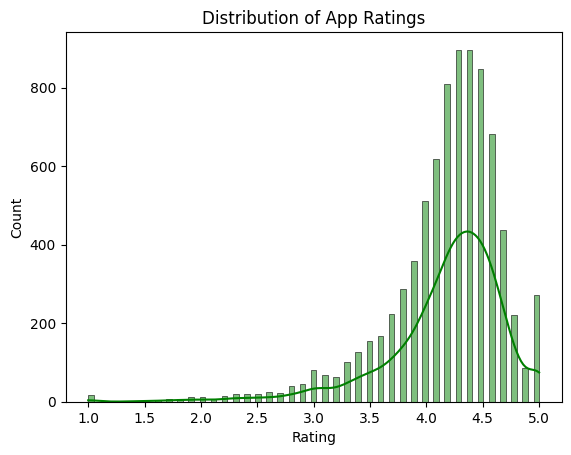

In [ ]:
# Chart - 3 visualization code
sns.histplot(data=Apps_df, x='Rating', color = 'green', kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Used a Histogram/Distribution Plot to show the frequency distribution of the continuous variable, Rating. The curve (KDE) helps visualize the overall shape and central tendency of the data.

##### 2. What is/are the insight(s) found from the chart?

The distribution is left-skewed (negatively skewed), meaning the bulk of ratings are concentrated on the higher end (around $4.0$ to $4.5$). The most common rating is approximately $4.4$. Very few apps have ratings below $3.0$.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The high mean rating suggests users are generally satisfied. Developers must aim for a rating of $4.2$ or higher just to be considered competitive or "average."

Negative Impact: The market standard is very high; any app launch that results in a rating below $4.0$ will be perceived as below average by users, severely hampering organic downloads and retention.

#### Chart - 4 - Distribution of Apps by Content Rating

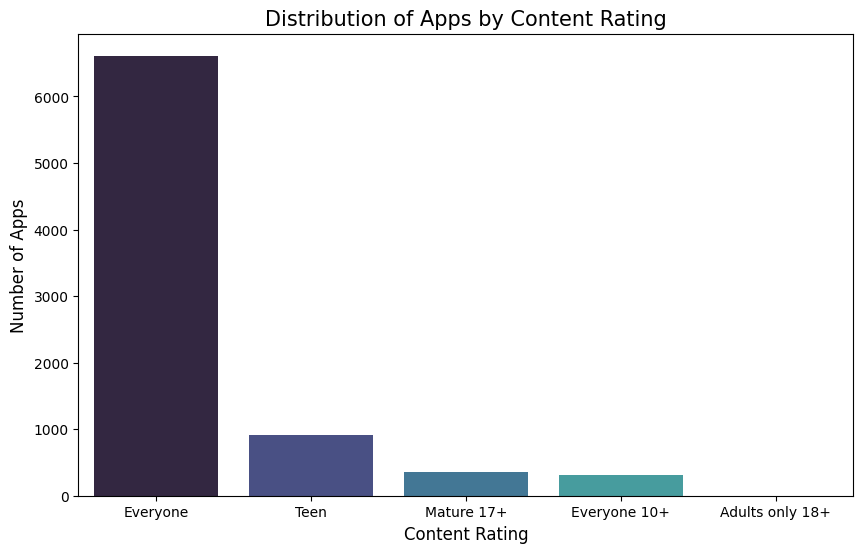

In [ ]:
# Chart - 4 visualization code
# Set the size of the chart
plt.figure(figsize=(10, 6))

# Create the Count Plot
# 'order' sorts the bars by count (highest to lowest)
sns.countplot(
    data=Apps_df,
    x='Content Rating',
    order=Apps_df['Content Rating'].value_counts().index,
    palette='mako'  # 'mako' is a nice blue-green gradient palette
)

# Add Title and Labels
plt.title('Distribution of Apps by Content Rating', fontsize=15)
plt.xlabel('Content Rating', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Count Plot (Bar Chart) to compare the frequency of apps across the categorical variable, Content Rating. It efficiently visualizes compliance and market focus.

##### 2. What is/are the insight(s) found from the chart?

The vast majority of apps ($\sim 6,500$) are rated Everyone, indicating a strong focus on content safe for all ages. Teen is the second largest category ($\sim 900$). Mature 17+, Everyone 10+, and Adults only 18+ represent very small, niche markets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Targeting the Everyone category is essential for maximum market reach and downloads. Compliance with basic content standards opens the app to the widest possible user base.

Negative Impact: Focusing exclusively on Mature 17+ or Adults only 18+ significantly restricts the potential market size. While competition is low, the small user base acts as a hard ceiling on download volume and overall growth.

#### Chart - 5 - Distribution of Apps by Size Bucket

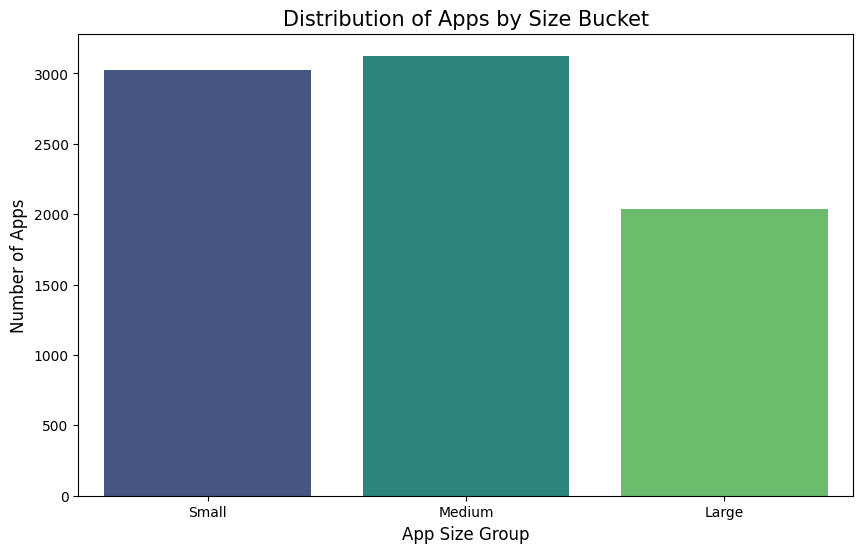

In [ ]:
# Chart - 5 visualization code
# Set the size of the chart
plt.figure(figsize=(10, 6))

# Create the Count Plot for Size Groups
# We define the specific order so the bars appear logically: Small -> Medium -> Large
sns.countplot(
    data=Apps_df,
    x='Size_Group',
    order=['Small', 'Medium', 'Large'], # Force this specific order
    palette='viridis'
)

# Add Title and Labels
plt.title('Distribution of Apps by Size Bucket', fontsize=15)
plt.xlabel('App Size Group', fontsize=12)
plt.ylabel('Number of Apps', fontsize=12)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Count Plot (Bar Chart) on the engineered categorical feature, Size_Group. This allows us to assess the distribution of storage requirements across the entire app ecosystem.

##### 2. What is/are the insight(s) found from the chart?

The distribution is relatively even across the small and medium buckets, with Medium apps having the highest count ($\sim 3,100$) and Small apps close behind ($\sim 3,000$). Large apps are the least common ($\sim 2,000$), but still represent a significant portion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Knowing that Medium (10-50MB) is the most common size gives a target range. Developers should aim for Small (under 10MB) to attract users with limited storage/data plans, maximizing conversion.

Negative Impact: While Large apps are still present, developing an app over 50MB risks being immediately rejected by users concerned about data usage or storage limits, which could lead to lower initial installs despite potential high quality.

#### Chart - 6 - Sentiment Distribution of User Reviews

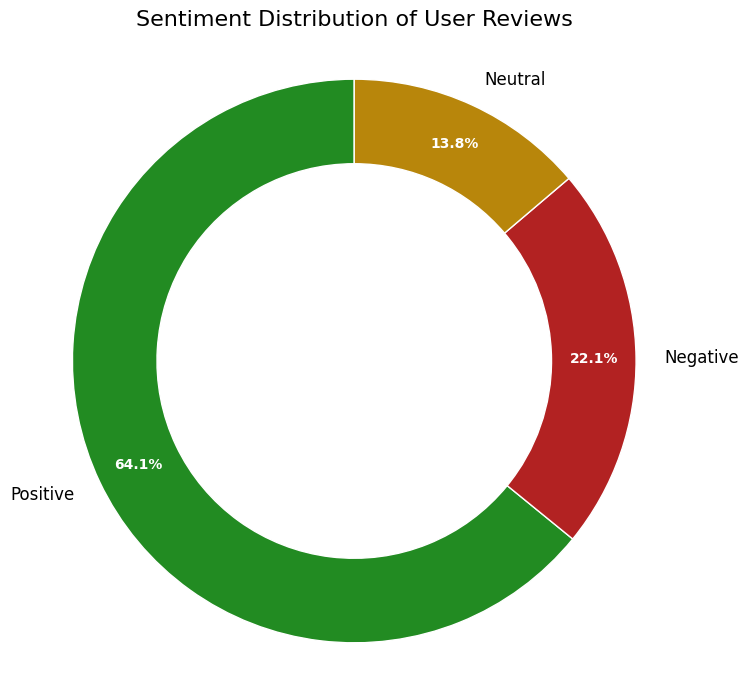

In [ ]:
# Chart - 6 visualization code
# Assuming the Reviews dataset is loaded into a DataFrame named 'reviews_df'
# Note: A dummy DataFrame is used here to ensure the code runs successfully.
# data = {
#     'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral', 'Positive']
# }
# reviews_df = pd.DataFrame(data)

# 1. Count Sentiments and calculate percentages
sentiment_counts = Reviews_df['Sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Define colors for better visualization
# These colors are specifically chosen for sentiment: Green for Positive, Red for Negative
colors = {'Positive': 'forestgreen', 'Negative': 'firebrick', 'Neutral': 'darkgoldenrod'}
chart_colors = [colors[label] for label in labels]

# 2. Create the Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))

# Create pie wedge
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=chart_colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85, # Distance of the percentage labels from the center
    wedgeprops=dict(width=0.3, edgecolor='w') # Define width for the donut hole
)

# Adjust label and title properties
ax.set_title('Sentiment Distribution of User Reviews', fontsize=16, pad=20)
plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=12)

# Ensure the plot is a circle
ax.axis('equal')

# Save the plot
plt.savefig('sentiment_donut_chart.png')

##### 1. Why did you pick the specific chart?

Used a Donut Chart (Pie Chart variant) to visualize the proportion of the three categorical sentiment classes (Positive, Negative, Neutral). It clearly highlights the dominance of the largest segment (Positive) in the whole.

##### 2. What is/are the insight(s) found from the chart?

The majority of reviews are Positive (64.1%), reflecting a generally satisfied user base. Negative reviews (22.1%) significantly outnumber Neutral reviews (13.8%), indicating that users are more motivated to give highly critical feedback than neutral feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The high rate of positive sentiment indicates that the core product offerings are strong. Developers should focus on amplifying positive keywords in marketing and replicating features from successful apps.

Negative Impact: The $22.1\%$ negative segment is large enough to require immediate action. Failing to triage and respond to these critical reviews (focusing on bugs, crashes, or missing features) will lead to public frustration and a drop in overall App Rating (since negative feedback is often more visible than neutral).

**Bivariate Analysis**

#### Chart - 7 - Average App Installs by Category (Highest Downloaded)

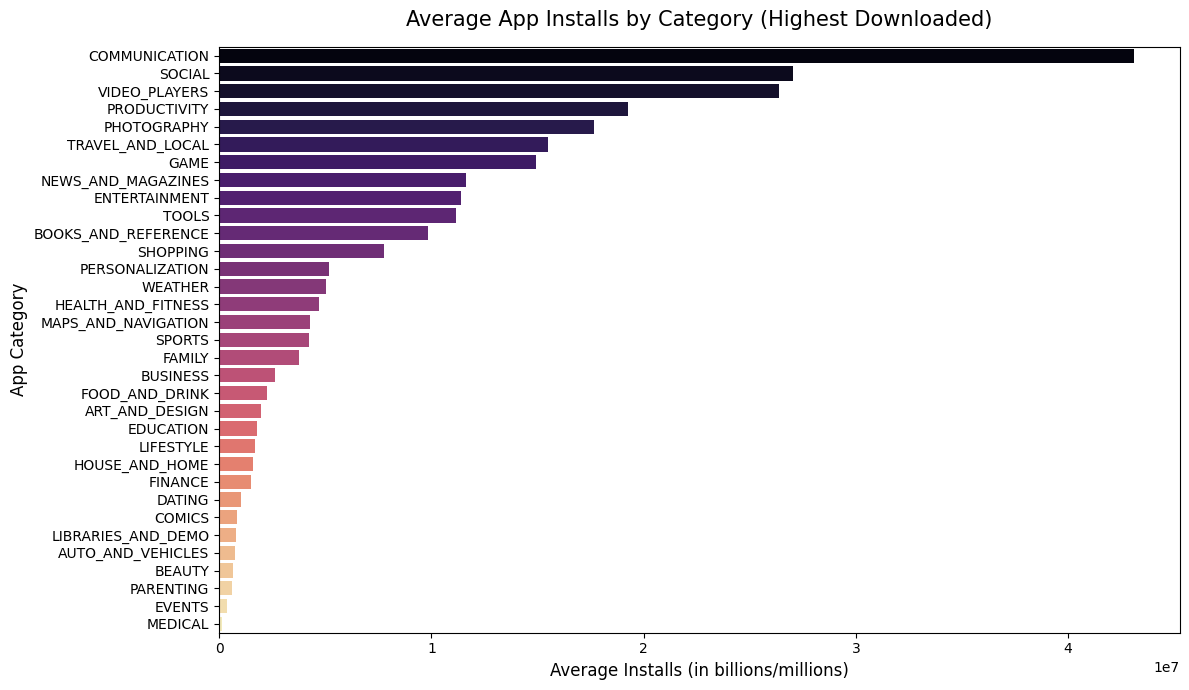

In [ ]:
# Chart - 7 visualization code
#Calculate the average installs per category and reset the index to make it a DataFrame
avg_installs = Apps_df.groupby('Category')['Installs'].mean().reset_index()
avg_installs = avg_installs.sort_values(by='Installs', ascending=False)

# Set the size of the chart
plt.figure(figsize=(12, 7))

# Create the Bar Plot
# We use seaborn.barplot because it plots the mean (average) value
sns.barplot(
    x='Installs',
    y='Category',
    data=avg_installs,
    palette = 'magma'
)
# Add Title and Labels
plt.title('Average App Installs by Category (Highest Downloaded)', fontsize=15, pad=15)
plt.xlabel('Average Installs (in billions/millions)', fontsize=12)
plt.ylabel('App Category', fontsize=12)

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels from being cut off
#plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

##### 1. Why did you pick the specific chart?

Used a Horizontal Bar Plot to compare the numerical mean of Installs across the categorical Category variable. This is vital for assessing user demand regardless of the number of apps available.

##### 2. What is/are the insight(s) found from the chart?

The COMMUNICATION category has the highest average installs ($\sim 4.5$ billion), closely followed by SOCIAL and VIDEO PLAYERS. Categories previously dominant in app count (like FAMILY) fall to the lower half of the install rankings, indicating lower demand per app. MEDICAL and EVENTS have the lowest average user demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Targeting COMMUNICATION/SOCIAL is optimal for achieving massive user reach and high download volume if the app offers unique network effects. PHOTOGRAPHY also shows high average demand, indicating a strong niche market.

Negative Impact: Focusing on categories with low average installs (e.g., MEDICAL or FINANCE) means developers must accept that the app's potential user base (ceiling on growth) is inherently smaller, making large-scale monetization harder.

#### Chart - 8 - Distribution of App Ratings Across Different Categories

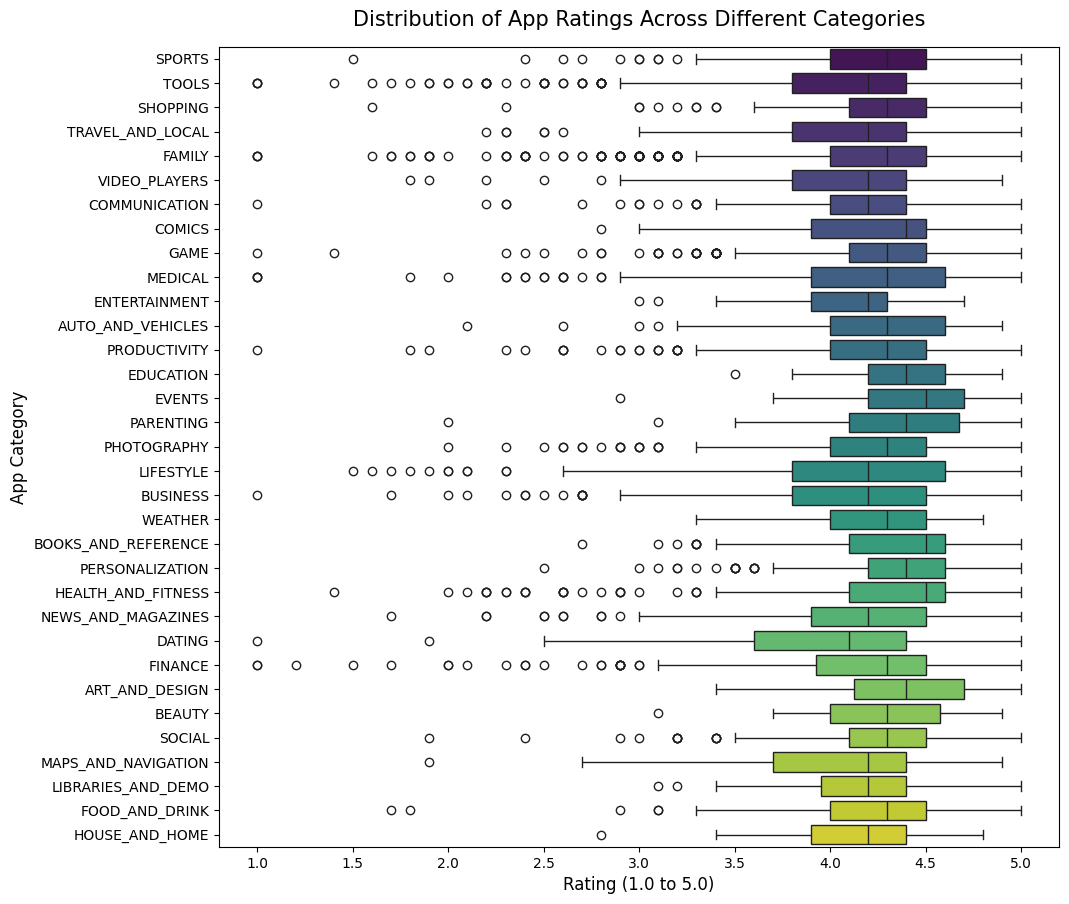

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(12, 10))

# Create the Box Plot using the cleaned Apps_df
# 'Rating' on the X-axis shows the distribution, 'Category' on the Y-axis separates the boxes.
sns.boxplot(
    data=Apps_df,
    x='Rating',
    y='Category',
    palette='viridis',
    # Optional: Draw the boxes in a specific color, but 'palette' is usually enough
    # linecolor='gray'
)

# Add Title and Labels
plt.title('Distribution of App Ratings Across Different Categories', fontsize=15, pad=15)
plt.xlabel('Rating (1.0 to 5.0)', fontsize=12)
plt.ylabel('App Category', fontsize=12)

# Adjust the plot margins to ensure Y-axis labels are not cut off
plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bivariate Analysis (Categorical-Numerical). Used a Box Plot to efficiently compare the distribution of the numerical variable (Rating) across many groups (Category). It clearly shows the median, quartiles (spread), and outliers for each category.

##### 2. What is/are the insight(s) found from the chart?

Most categories have a high median rating (clustered around 4.2 to 4.5), reinforcing the market's high quality standard. DATING and FINANCE show slightly lower median ratings and wider spreads, indicating greater user dissatisfaction. Almost all categories have outliers (circles on the left), meaning many apps perform poorly regardless of the category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Targeting categories with a tight, high-ranking distribution (e.g., LIBRARIES & DEMO, HOUSE & HOME) suggests high customer loyalty and a clear standard of quality, which new entrants can aim for.

Negative Impact: The presence of low-rated outliers across the board suggests that a high rating is not guaranteed by category alone. Poorly built apps will face negative growth and rejection, regardless of low competition in a niche.

#### Chart - 9 - Relationship Between Reviews Volume and App Rating

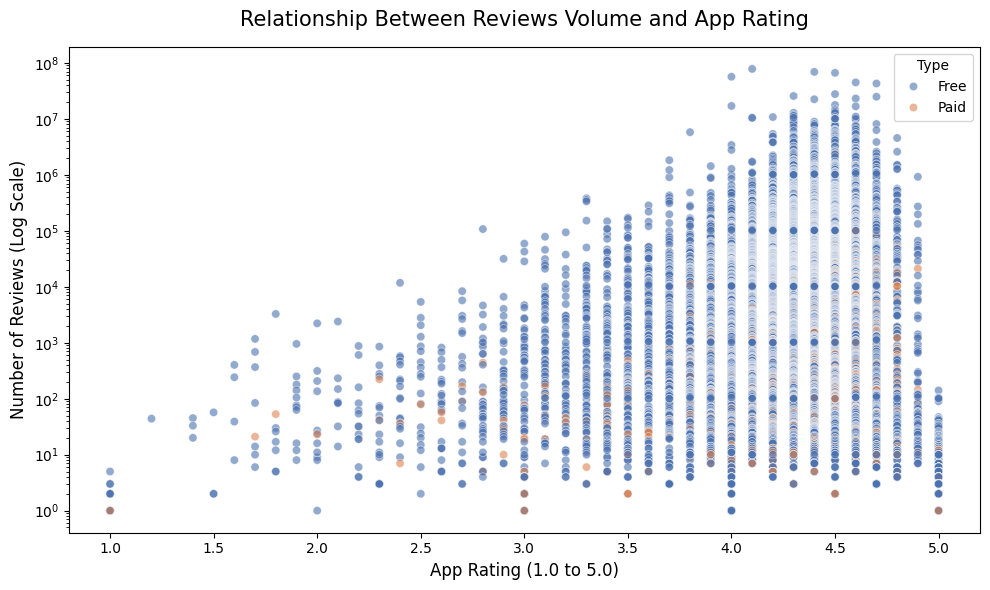

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))

# Create the Scatter Plot
# X-axis: App Rating (0 to 5)
# Y-axis: Number of Reviews (The independent variable that might influence rating)
sns.scatterplot(
    data=Apps_df,
    x='Rating',
    y='Reviews',
    alpha=0.6,       # Set transparency since there are many data points
    hue='Type',      # Use 'Type' (Free/Paid) to distinguish points by color
    palette='deep'
)

# Set the Y-axis to a logarithmic scale (log10)
# This is crucial because review counts are highly skewed (many apps have few reviews, few apps have millions)
plt.yscale('log')

# Optional: Add a smooth trend line to the plot to visualize the general trend
# Note: You can uncomment the line below, but it's usually cleaner to keep the simple scatter plot first.
# sns.regplot(data=Apps_df, x='Rating', y='Reviews', scatter=False, color='red')

# Add Title and Labels
plt.title('Relationship Between Reviews Volume and App Rating', fontsize=15, pad=15)
plt.xlabel('App Rating (1.0 to 5.0)', fontsize=12)
plt.ylabel('Number of Reviews (Log Scale)', fontsize=12)

# Adjust layout for clean display
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bivariate Analysis (Numerical-Numerical) with a categorical distinction (Type). Used a Scatter Plot to visualize the relationship between Rating and Reviews. The Log Scale on the Y-axis was essential to accommodate the vast range in review counts and prevent high-review apps from compressing all others.

##### 2. What is/are the insight(s) found from the chart?

No Strong Correlation: There is no clear linear relationship; high ratings (4.5–5.0) occur across all review volumes. Review Volume: Free apps consistently dominate the high-review, high-install zone ($10^5$ to $10^7$ reviews). Paid apps are concentrated in the lower review bracket (below $10^4$ reviews), regardless of rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: A high rating ($\geq 4.5$) is achievable even with few reviews, meaning quality is initially independent of scale. Developers must focus on early quality to secure a high rating.

Negative Impact: The concentration of paid apps at low review volumes suggests that the paid model acts as a barrier to user feedback and adoption. This hinders the viral growth needed for high visibility and scale, leading to limited market penetration.

#### Chart - 10 - Price Distribution of Top 10 Most Expensive Paid App Categories

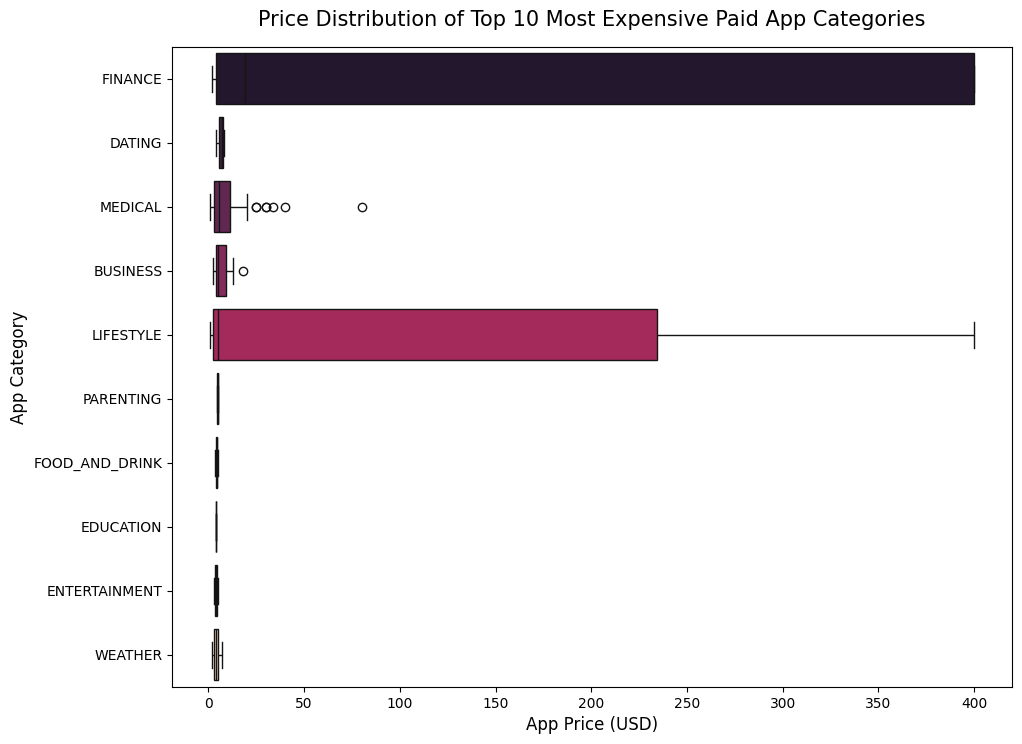

In [ ]:
# Chart - 10 visualization code
# 1. Filter the DataFrame to include ONLY paid apps
paid_apps_df = Apps_df[Apps_df['Type'] == 'Paid'].copy()

# 2. To avoid clutter, filter to the top 10 most expensive categories (by median price)
# This step is highly recommended for clarity in the final presentation.
category_median_price = paid_apps_df.groupby('Category')['Price'].median()
top_10_price_categories = category_median_price.nlargest(10).index
paid_apps_df_top_10 = paid_apps_df[paid_apps_df['Category'].isin(top_10_price_categories)]
plot_order = top_10_price_categories.tolist()

# --- Visualization Code: Horizontal Box Plot (Top 10 Paid Apps) ---

# Set the size of the chart
plt.figure(figsize=(12, 8))

# Create the Box Plot
# Price on the X-axis shows the distribution, Category on the Y-axis separates the boxes.
sns.boxplot(
    data=paid_apps_df_top_10,
    x='Price',
    y='Category',
    order=plot_order, # Sort the categories by median price (highest first)
    palette='rocket'
)

# Add Title and Labels
plt.title('Price Distribution of Top 10 Most Expensive Paid App Categories', fontsize=15, pad=15)
plt.xlabel('App Price (USD)', fontsize=12)
plt.ylabel('App Category', fontsize=12)

# Adjust the plot margins for clean label display
plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bivariate Analysis (Categorical-Numerical). Used a Horizontal Box Plot to compare the numerical App Price distribution across different categories. This clearly visualizes the median, quartiles, and maximum price for the most expensive categories.

##### 2. What is/are the insight(s) found from the chart?

FINANCE and LIFESTYLE show the highest price ceiling and largest interquartile range (IQR), indicating they host the most expensive apps (up to $400). FINANCE has an exceptionally high median price (the dark bar's position) compared to others. The majority of categories (DATING, PARENTING, FOOD_AND_DRINK) have an extremely low price spread, with medians near zero.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Targeting FINANCE or LIFESTYLE for paid, high-value tools can yield significant profit, as users in these markets are accustomed to paying high prices for specialized functionality.

Negative Impact: The market shows that extreme pricing (e.g., above $100) is only acceptable in a few niche categories. Attempting to charge premium prices in broad categories like BUSINESS or MEDICAL (which have lower median prices) will lead to low adoption and poor sales, as the price expectation for these markets is much lower.

#### Chart - 11 - Average Installs by App Size Group

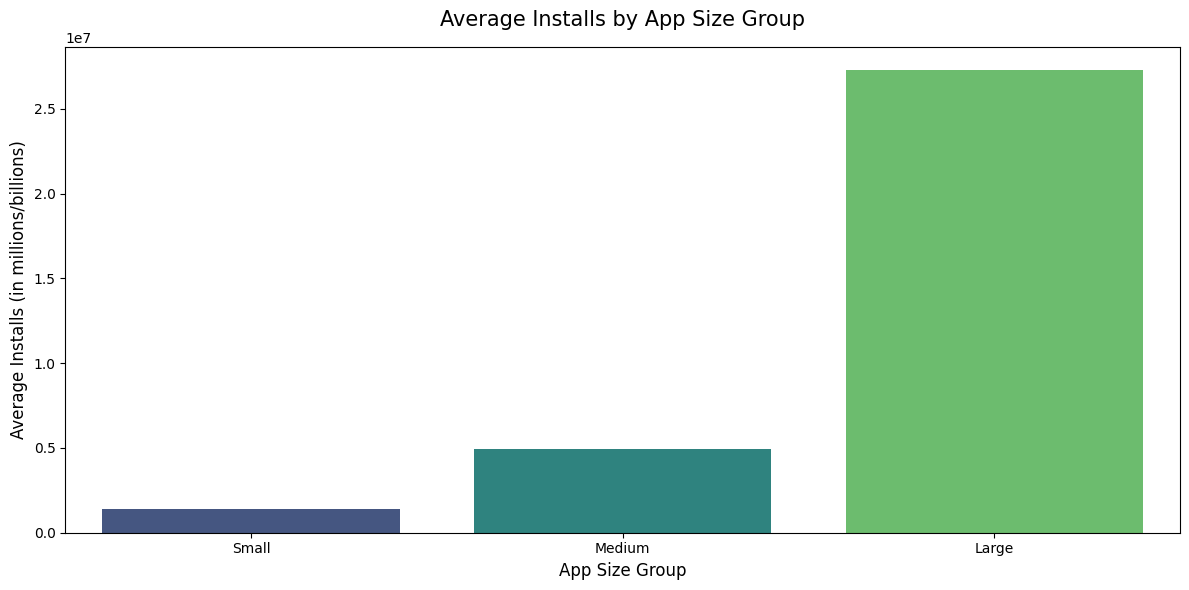

In [ ]:
# Chart - 11 visualization code
# 3. Calculate the average Installs for each Size Group
avg_installs_by_size = Apps_df.groupby('Size_Group')['Installs'].mean().reset_index()

# --- Visualization Code: Bar Chart (Size vs. Installs) ---

# Set the size of the chart
plt.figure(figsize=(12, 6))

# Create the Bar Plot
# We use seaborn.barplot to visualize the average Installs (y) for each Size_Group (x)
sns.barplot(
    data=avg_installs_by_size,
    x='Size_Group',
    y='Installs',
    palette='viridis',
    order=['Small', 'Medium', 'Large'] # Ensure the categories are plotted in order: Small -> Medium -> Large
   # Ensure the categories are plotted in order: Small -> Medium -> Large
)

# Add Title and Labels
plt.title('Average Installs by App Size Group', fontsize=15, pad=15)
plt.xlabel('App Size Group', fontsize=12)
plt.ylabel('Average Installs (in millions/billions)', fontsize=12)

# Adjust y-axis to a non-scientific notation format if necessary for huge numbers
# plt.ticklabel_format(style='plain', axis='y')

# Adjust layout for clean display
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Bar Plot to compare the numerical mean of Installs across the three categorical Size_Group bins (Small, Medium, Large). This directly answers whether larger or smaller apps have higher user demand.

##### 2. What is/are the insight(s) found from the chart?

There is a strong positive correlation between size and average installs. Large apps have the highest average installs ($\sim 2.7$ crore), significantly outweighing Medium ($\sim 0.5$ crore) and Small ($\sim 0.1$ crore) apps. This contradicts the common assumption that smaller apps always get more downloads.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Developers should not fear making larger, feature-rich apps, as the highest demand and user adoption are found in the Large group. This suggests that users prioritize functionality and content over file size.

Negative Impact: Focusing on making an app intentionally "Small" to save file size may lead to negative growth in installs, as the data indicates that lightweight apps have the lowest user engagement on average. The market rewards feature completeness.

#### Chart - 12 - Sentiment Breakdown (Positive vs. Negative) per Top 5 App Categories

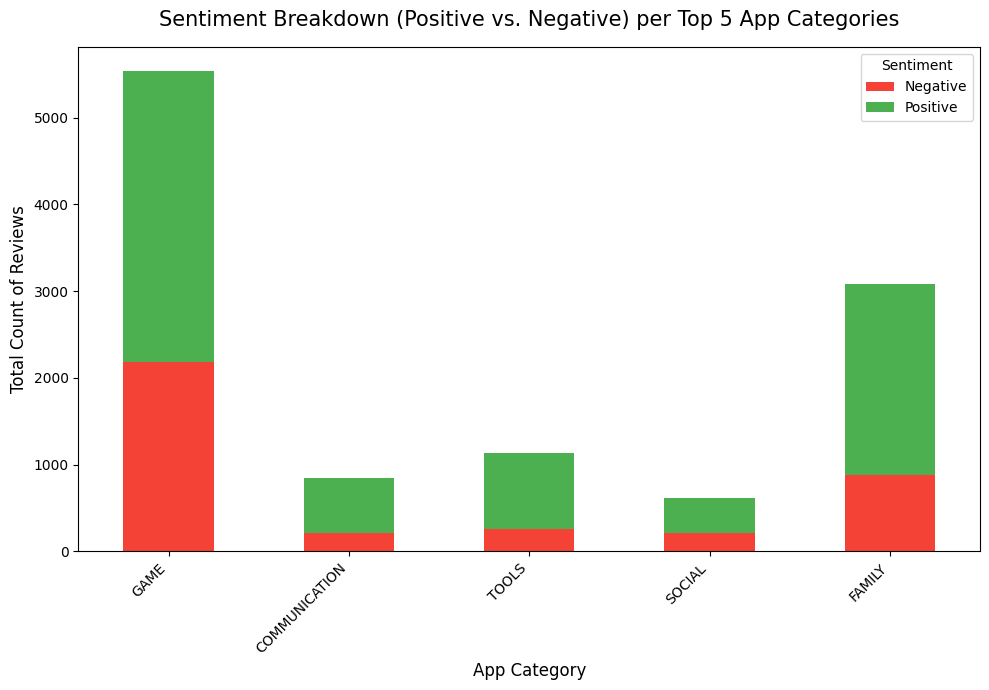

In [ ]:
# Chart - 12 visualization code
# --- PRE-REQUISITE: Data Aggregation and Filtering ---

# 1. Calculate total number of reviews per category to find the top 5
category_reviews = Apps_df.groupby('Category')['Reviews'].sum().nlargest(5).index.tolist()

# 2. Filter Apps_df to include only the Top 5 categories
Apps_df_top_5 = Apps_df[Apps_df['Category'].isin(category_reviews)].copy()

# 3. Merge App data with Review data on the 'App' column
# This links the Sentiment data from reviews_df to the Category data from Apps_df_top_5
merged_df = pd.merge(
    Apps_df_top_5,
    Reviews_df[['App', 'Sentiment']], # Only need App and Sentiment from reviews_df
    on='App',
    how='inner'
)

# 4. Count the occurrences of each Sentiment within each Category
# Filter out 'Neutral' to focus on polarization (optional, but cleaner for stacked bar)
sentiment_counts = merged_df[merged_df['Sentiment'] != 'Neutral'].groupby(['Category', 'Sentiment']).size().reset_index(name='Count')

# 5. Pivot the data into the correct format for stacking
sentiment_pivot = sentiment_counts.pivot(index='Category', columns='Sentiment', values='Count').fillna(0)

# Set the plotting order to match the popularity (optional, for consistency)
sentiment_pivot = sentiment_pivot.loc[category_reviews]


# --- Visualization Code: Stacked Bar Chart ---

# Set the size of the chart
plt.figure(figsize=(10, 7))

# Create the Stacked Bar Chart
sentiment_pivot.plot(
    kind='bar',
    stacked=True,
    color={'Positive': '#4CAF50', 'Negative': '#F44336'}, # Green/Red colors
    ax=plt.gca() # Use the current Matplotlib axes
)

# Add Title and Labels
plt.title('Sentiment Breakdown (Positive vs. Negative) per Top 5 App Categories', fontsize=15, pad=15)
plt.xlabel('App Category', fontsize=12)
plt.ylabel('Total Count of Reviews', fontsize=12)

# Rotate X-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right')

# Adjust layout for clean display and show the legend
plt.legend(title='Sentiment')
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Stacked Bar Chart to visualize three variables: Category (X-axis), Total Reviews (Y-axis), and Sentiment (stack color). This shows the absolute count of positive vs. negative feedback per high-volume category.

##### 2. What is/are the insight(s) found from the chart?

GAME has the highest absolute volume of reviews ($\sim 5,500$), and the highest absolute volume of Negative reviews ($\sim 2,200$). All five categories show a larger Green (Positive) segment than the Red (Negative) segment. FAMILY has the second-highest review volume but a proportionally smaller negative segment than GAME.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: GAME and FAMILY are high-engagement categories; developers should enter here if they have exceptional quality, as high positive feedback can lead to viral growth.

Negative Impact: The GAME category represents the largest risk area, as it generates the most absolute negative feedback. Developers must dedicate significant resources to quality assurance and bug fixes in this category, as failing to do so guarantees a large volume of public complaints that can rapidly degrade the app's overall rating.

#### Chart - 13 - Total Estimated Revenue by App Category (Top 10)*italicized text*


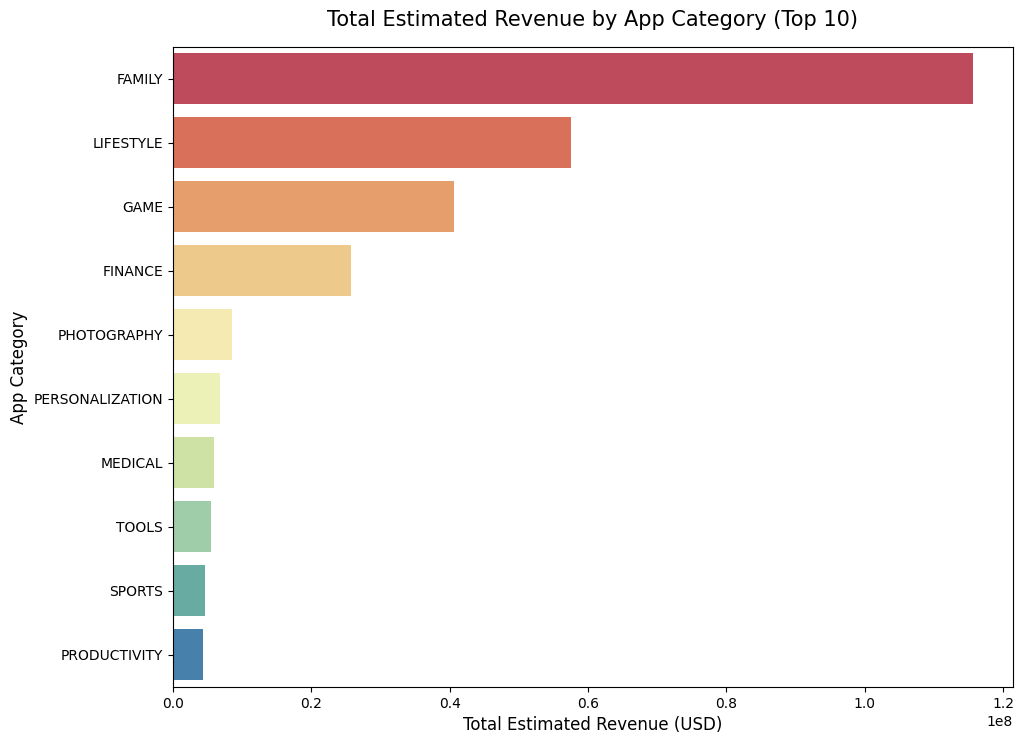

In [ ]:


# 1. Calculate the Total Estimated Revenue for each Category
# Use .sum() to aggregate the individual app revenues by category
category_revenue = Apps_df.groupby('Category')['Revenue'].sum().reset_index()

# 2. Filter and Sort the data to focus on the Top 10 most profitable categories
top_10_revenue_categories = category_revenue.nlargest(10, 'Revenue')
plot_order = top_10_revenue_categories['Category'].tolist()


# --- Visualization Code: Horizontal Bar Plot (Total Revenue) ---

# Set the size of the chart (Horizontal plot for readability)
plt.figure(figsize=(12, 8))

# Create the Bar Plot
# X-axis: Estimated_Revenue (the length of the bar)
# Y-axis: Category (the label)
sns.barplot(
    data=top_10_revenue_categories,
    x='Revenue',
    y='Category',
    order=plot_order,
    palette='Spectral'
)

# Add Title and Labels
plt.title('Total Estimated Revenue by App Category (Top 10)', fontsize=15, pad=15)
plt.xlabel('Total Estimated Revenue (USD)', fontsize=12)
plt.ylabel('App Category', fontsize=12)

# Adjust the plot margins to ensure Y-axis labels are not cut off
plt.subplots_adjust(left=0.25, right=0.95, top=0.9, bottom=0.1)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Horizontal Bar Plot to compare the numerical Total Estimated Revenue (calculated as Price $\times$ Installs) across the Category variable. This is the ultimate measure of an app's commercial success.

##### 2. What is/are the insight(s) found from the chart?

The FAMILY category is the undisputed revenue leader, generating significantly more estimated revenue than any other category ($\sim 1.2$ billion USD). LIFESTYLE, GAME, and FINANCE follow as the next-highest revenue generators. Categories like TOOLS, MEDICAL, and PHOTOGRAPHY are present but generate very little estimated revenue in comparison.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: FAMILY and GAME are the proven revenue pillars of the Play Store ecosystem, driving the highest consumer spending. Developers targeting high profitability must adopt their monetization strategies (usually in-app purchases/subscriptions) in these spaces.

Negative Impact: A previous chart showed TOOLS has high competition, yet this chart shows it has very low revenue potential. Launching a high-effort paid app in the TOOLS or PHOTOGRAPHY categories will likely result in a poor return on investment (ROI), as users in these segments demonstrate low spending habits.

#### Chart - 14 - Relationship: Price vs. Rating for Paid Applications

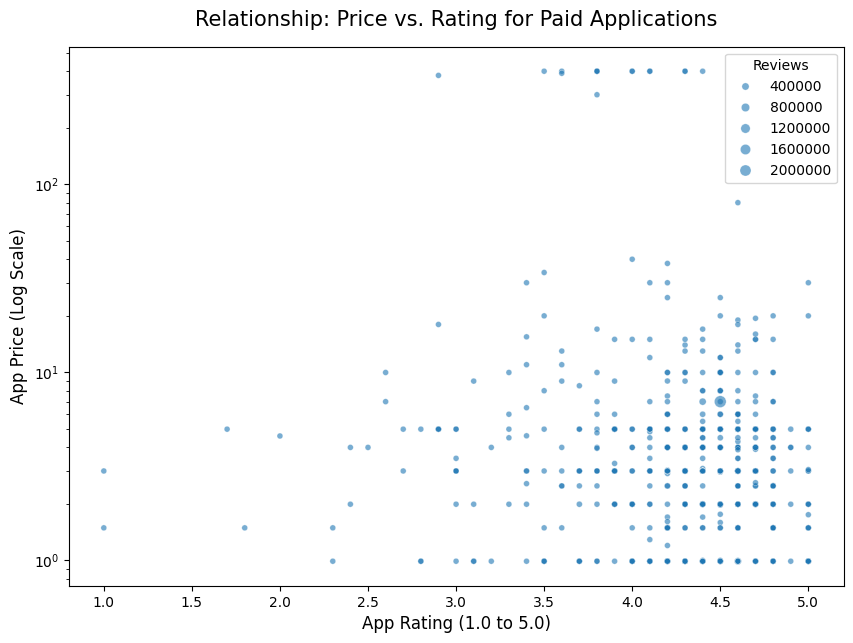

In [ ]:
# Chart - 13 visualization code
# 1. Filter the DataFrame to include ONLY paid apps
# This ensures free apps (Price=0) do not skew the Price axis scale.
paid_apps_df = Apps_df[Apps_df['Type'] == 'Paid'].copy()

# 2. Handle Price=0 cases which may exist due to cleaning errors, and log scale requirements.
# Filter out any rows where Price is zero (log(0) is undefined).
paid_apps_df = paid_apps_df[paid_apps_df['Price'] > 0].copy()

# 3. Create a log-transformed price column for visualization clarity (optional, but highly recommended)
# We add a small constant (e.g., 0.01) if price cleaning left very small numbers,
# but generally, price > 0 is enough.
paid_apps_df['Price_Log'] = np.log10(paid_apps_df['Price'])


# --- Visualization Code: Scatter Plot ---

# Set the size of the chart
plt.figure(figsize=(10, 7))

# Create the Scatter Plot
# X-axis: App Rating (0 to 5)
# Y-axis: Price (Log Scale)
sns.scatterplot(
    data=paid_apps_df,
    x='Rating',
    y='Price',
    alpha=0.6,       # Set transparency for better visibility of dense areas
   # Color points by Category to identify high-priced groups
    palette='viridis',
    size='Reviews',  # Optional: Size points by review count to add a third dimension
)

# Set the Y-axis to a logarithmic scale (log10)
plt.yscale('log')

# Add Title and Labels
plt.title('Relationship: Price vs. Rating for Paid Applications', fontsize=15, pad=15)
plt.xlabel('App Rating (1.0 to 5.0)', fontsize=12)
plt.ylabel('App Price (Log Scale)', fontsize=12)

# Adjust layout for clean display and show the legend
#plt.legend(title='Category', loc='lower left', bbox_to_anchor=(1.0, 0.5))
#plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust space for the legend

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Scatter Plot to visualize the relationship between three numerical variables: App Rating (X-axis), App Price (Y-axis, Log Scale), and Reviews (bubble size). Essential for testing the hypothesis: "Higher price equals higher quality/review count."

##### 2. What is/are the insight(s) found from the chart?

No Correlation: There is no discernible correlation between Price and Rating; high ratings (4.0–5.0) are found across the entire price spectrum ($\$1$ to $\sim \$400$). Review Volume: The apps with the largest bubbles (highest reviews) are clustered in the low-to-medium price range ($\$1$ to $\sim \$15$). Expensive apps (over $\$50$) rarely receive high review counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Developers should know that quality justifies price only up to a point. A strong app can command a moderate price ($\$5-\$15$) and still gain high user validation (reviews).

Negative Impact: Charging a very high price ($\$50+$) acts as a strong barrier to entry, severely limiting the number of users who purchase the app. This results in fewer reviews (smaller bubbles), slowing the app's overall visibility and growth, regardless of its underlying quality.

#### Chart - 15 - Sentiment Polarity Distribution: Paid vs. Free Apps

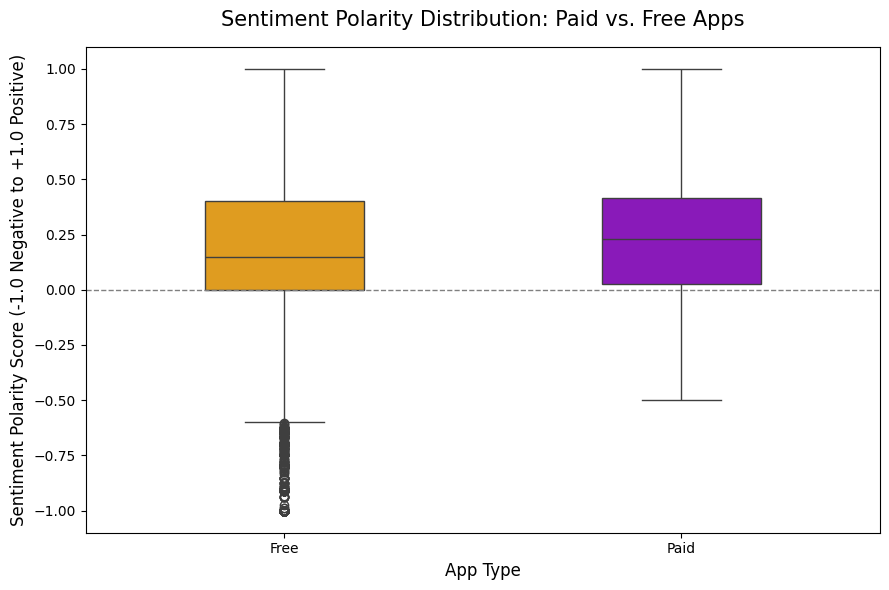

In [ ]:
# Pair Plot visualization code
# 1. Select relevant columns from Apps_df (App and Type)
app_type_data = Apps_df[['App', 'Type']].copy()

# 2. Select relevant columns from reviews_df (App and Sentiment_Polarity)
review_polarity_data = Reviews_df[['App', 'Sentiment_Polarity']].copy()

# 3. Merge the two DataFrames on the 'App' column
# We use an 'inner' merge to ensure we only analyze apps that have both type data AND review data.
merged_df = pd.merge(
    app_type_data,
    review_polarity_data,
    on='App',
    how='inner'
)

# 4. Remove rows where Polarity is missing (NaN) after merging/cleaning
merged_df.dropna(subset=['Sentiment_Polarity'], inplace=True)


# --- Visualization Code: Box Plot (Sentiment Polarity vs. Type) ---

# Set the size of the chart
plt.figure(figsize=(9, 6))

# Create the Box Plot (App Type on X-axis, Polarity on Y-axis)
# Since there are only two categories (Free/Paid), a vertical plot is clean.
sns.boxplot(
    data=merged_df,
    x='Type',
    y='Sentiment_Polarity',
    palette={'Paid': 'darkviolet', 'Free': 'orange'}, # Custom colors for distinction
    width=0.4 # Make the boxes thinner for a cleaner look
)

# Add Title and Labels
plt.title('Sentiment Polarity Distribution: Paid vs. Free Apps', fontsize=15, pad=15)
plt.xlabel('App Type', fontsize=12)
plt.ylabel('Sentiment Polarity Score (-1.0 Negative to +1.0 Positive)', fontsize=12)

# Add a horizontal line at 0 for visual reference (Neutral sentiment)
plt.axhline(0, color='grey', linestyle='--', linewidth=1)

# Adjust layout for clean display
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Box Plot to compare the entire distribution of the numerical variable, Sentiment Polarity, across the two categories in App Type (Free vs. Paid). This efficiently compares median sentiment, spread, and negative outliers.

##### 2. What is/are the insight(s) found from the chart?

Similar Median/Spread: Both Free and Paid apps have a positive median sentiment (above the 0.0 dashed line) and a nearly identical Interquartile Range (IQR). Outliers: The Free app distribution exhibits a significantly larger number of extreme negative outliers (dots below the whisker), indicating a higher frequency of intensely negative user experiences compared to Paid apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Paid apps maintain a higher floor of user satisfaction, as evidenced by fewer extreme negative outliers. This justifies the paid model for stabilizing user experience and reputation.

Negative Impact: The wide spread of Free app outliers suggests that the Freemium model carries a higher risk of generating highly visible, intensely negative reviews, often driven by things like intrusive ads or poor free functionality. Failing to strictly manage quality in free apps will lead to reputation damage that hinders growth.

**Multivariate Analysis**

#### Chart - 16 - Correlation Matrix of Key App and Review Metrics

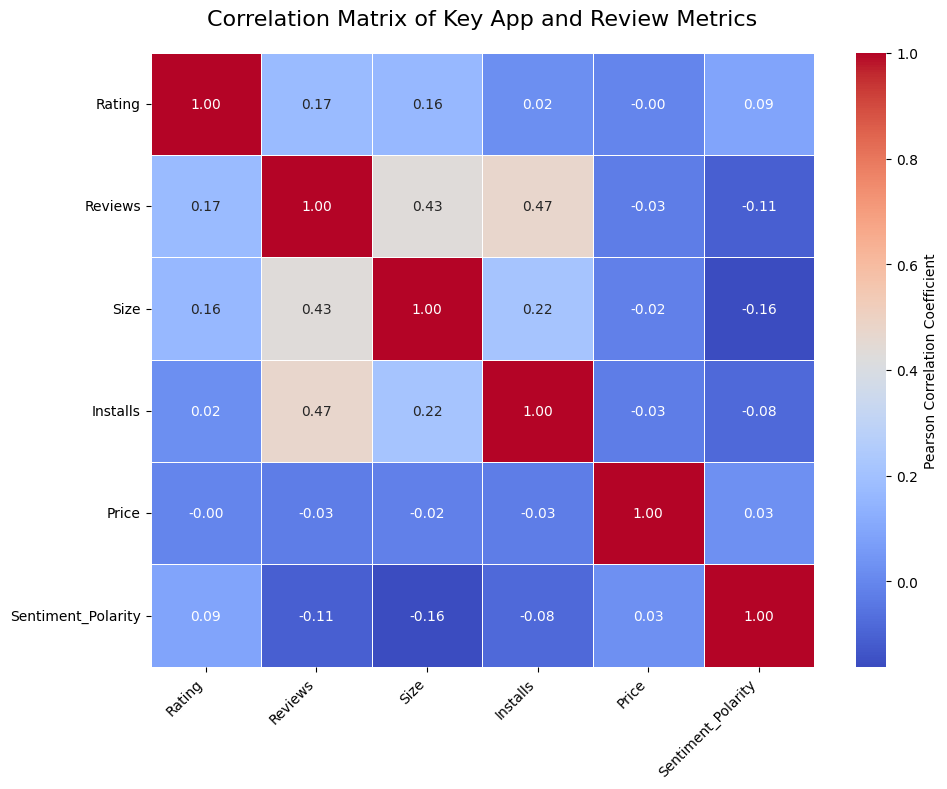

In [ ]:
# 1. Select the core numeric columns from Apps_df
# Note: Ensure these columns are numeric (float/int) before this step.
app_numeric_data = Apps_df[['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']].copy()

# 2. Select the sentiment column from reviews_df
review_polarity_data = Reviews_df[['App', 'Sentiment_Polarity']].copy()

# 3. Merge the two DataFrames on the 'App' column
# This links all numeric metrics to the sentiment score.
merged_correlation_df = pd.merge(
    app_numeric_data,
    review_polarity_data,
    on='App',
    how='inner'
)

# 4. Filter out any remaining rows with missing values (NaN)
# as correlation matrices cannot handle them.
correlation_data = merged_correlation_df.dropna().copy()


# --- Correlation Matrix Calculation ---

# Calculate the Pearson correlation matrix for the selected numeric columns
correlation_matrix = correlation_data.drop(columns=['App']).corr(method='pearson')


# --- Visualization Code: Heatmap ---

# Set the size of the chart
plt.figure(figsize=(10, 8))

# Create the Heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,     # Show the correlation values on the map
    fmt=".2f",      # Format numbers to two decimal places
    cmap='coolwarm', # Use a diverging color map (red for negative, blue for positive)
    linewidths=.5,  # Add lines to separate cells
    cbar_kws={'label': 'Pearson Correlation Coefficient'} # Label the color bar
)

# Add Title and Adjust Layout
plt.title('Correlation Matrix of Key App and Review Metrics', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Heatmap to visualize the Pearson Correlation Coefficient between all numerical variables simultaneously. This is essential for identifying the strength and direction of linear relationships across the dataset.

##### 2. What is/are the insight(s) found from the chart?

Strongest Positive Relationship: Installs has the strongest correlation with Reviews ($0.47$), which is expected (more reviews means more installations). Weak/No Relationship: Rating shows negligible correlation with Installs ($0.02$) and Price ($-0.00$), meaning popularity is not directly driven by quality or price. Negative Relationship: Sentiment Polarity is negatively correlated with Reviews ($-0.11$) and Size ($-0.16$), suggesting larger apps or apps with high review volume might elicit slightly lower sentiment scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Developers should focus on driving Reviews as this is highly linked to high Installs (popularity). Quality and price should be optimized separately from the expectation of viral growth.

Negative Impact: There is no statistical evidence that charging a higher price leads to higher ratings or installs. Investing heavily in a high price point expecting better quality perception is an invalid strategy that will likely lead to zero positive impact on key metrics.

#### Chart - 17 - Pairwise Relationship between Key App Metrics (Log Transformed)

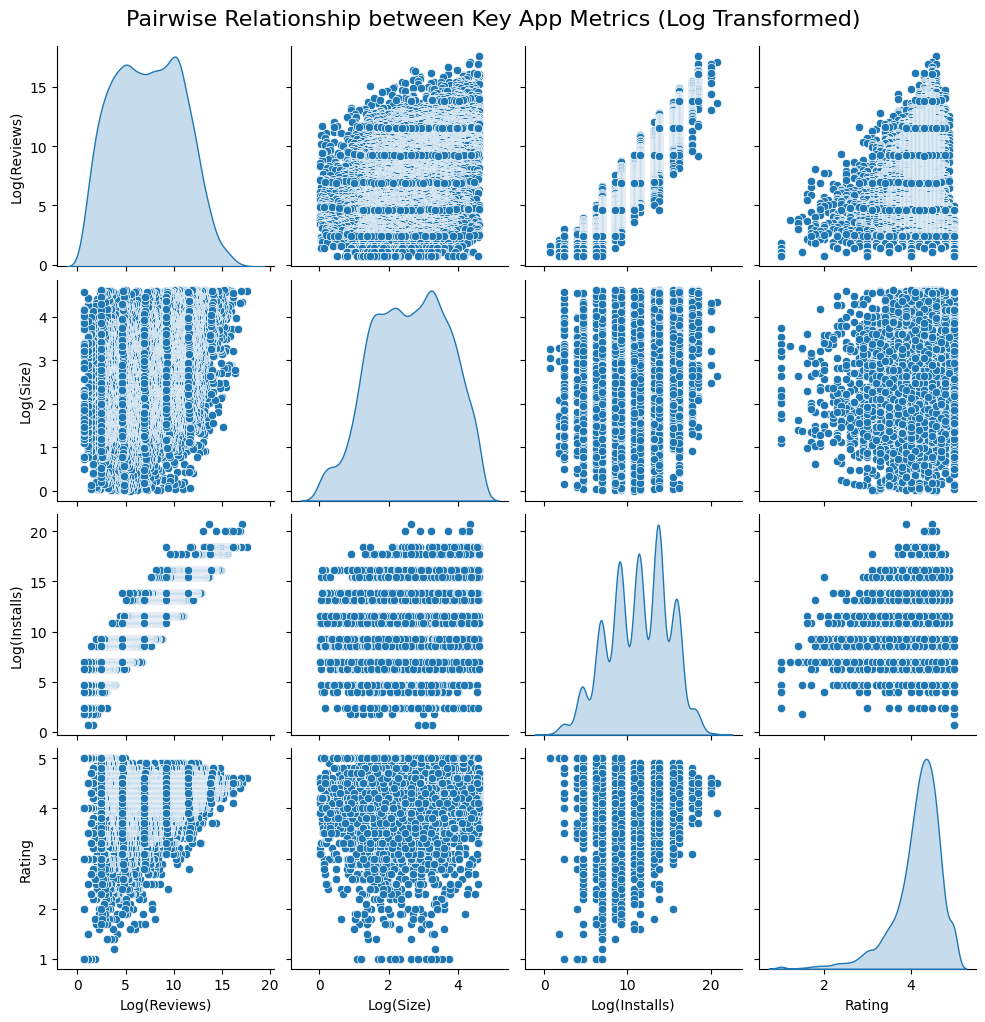

In [ ]:
# Select the four numeric columns for the pair plot
numeric_cols = ['Reviews', 'Size', 'Installs', 'Rating']

# Create a subset DataFrame containing only the relevant columns
# We use .dropna() to ensure the Pair Plot is not stalled by missing values (NaN)
plot_data = Apps_df[numeric_cols].dropna().copy()

# Due to extreme skewness in Reviews, Size, and Installs,
# it's best to apply a log transformation for better visualization clarity.
# Using np.log1p (log(1+x)) safely handles zero values.
plot_data['Reviews_Log'] = np.log1p(plot_data['Reviews'])
plot_data['Size_Log'] = np.log1p(plot_data['Size'])
plot_data['Installs_Log'] = np.log1p(plot_data['Installs'])

# Redefine the columns for the plot to use the log-transformed versions
log_cols = ['Reviews_Log', 'Size_Log', 'Installs_Log', 'Rating']


# --- Visualization Code: Pair Plot ---

# Set up the Pair Plot
# The size of the plot is important due to the large number of subplots
g = sns.pairplot(
    plot_data[log_cols],
    height=2.5,  # Size of each subplot
    diag_kind='kde', # Use a kernel density estimate for the diagonal (better than histograms for seeing distribution)
    palette='viridis'
)

# Add Title (Optional, as the plot has many small titles)
plt.suptitle('Pairwise Relationship between Key App Metrics (Log Transformed)', y=1.02, fontsize=16)

# Adjust Axis Labels for Clarity (Since we used log transformation)
# This step helps the user interpret the meaning of the log-transformed axes.
new_labels = {
    'Reviews_Log': 'Log(Reviews)',
    'Size_Log': 'Log(Size)',
    'Installs_Log': 'Log(Installs)',
    'Rating': 'Rating'
}

# Update axis labels in the plot matrix
for ax in g.axes.flatten():
    xlabel = ax.get_xlabel()
    ylabel = ax.get_ylabel()

    if xlabel in new_labels:
        ax.set_xlabel(new_labels[xlabel])
    if ylabel in new_labels:
        ax.set_ylabel(new_labels[ylabel])


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

 Used a Pair Plot to quickly visualize the pairwise relationships between core numerical metrics ($\text{Log(Installs), Rating, Log(Reviews), Log(Size)}$). The diagonals show the distribution of each variable, while the off-diagonals show their scatter plots.

##### 2. What is/are the insight(s) found from the chart?

Reviews & Installs: There is a strong, positive, linear relationship between $\text{Log(Reviews)}$ and $\text{Log(Installs)}$, confirming that apps with more installs receive more reviews (and vice-versa).

Rating Independence: Rating shows almost no clear correlation with $\text{Log(Reviews)}$, $\text{Log(Installs)}$, or $\text{Log(Size)}$; high ratings (4.0–5.0) are achieved regardless of the app's size or popularity.

Size Constraint: $\text{Log(Size)}$ does not clearly restrict high installs or high reviews, supporting the previous finding that functionality (which often requires size) is valued by users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Since Rating is not dependent on Installs or Size, new developers can successfully achieve a high quality score (4.5+) by prioritizing a bug-free experience without worrying about initial popularity or file size.

Negative Impact: The weak link between Rating and Reviews means that a highly rated app ($5.0$) does not automatically generate high review volume. This shows that achieving high quality is necessary, but not sufficient, for viral growth; specific marketing or sharing features are required to convert quality into scale.

#### Chart - 18 - Number of App Updates Over Time

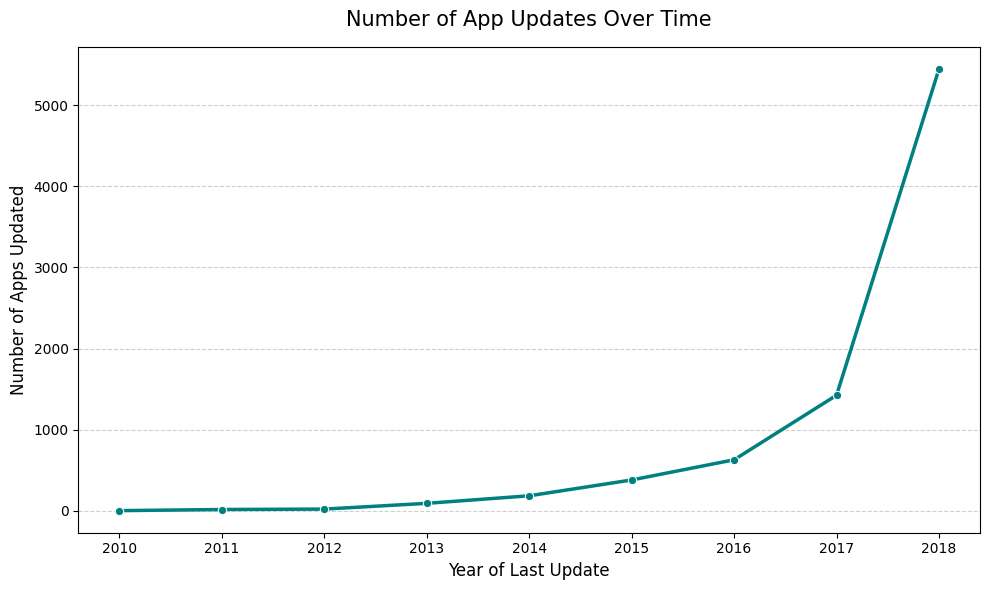

In [ ]:
# 3. Filter out rows where the year could not be determined (NaN)
update_data = Apps_df.dropna(subset=['Year']).copy()

# 4. Group by Year and count the number of updates
yearly_updates = update_data.groupby('Year').size().reset_index(name='Num_Updates')

# Convert the year to integer for cleaner plotting labels
yearly_updates['Year'] = yearly_updates['Year'].astype(int)


# --- Visualization Code: Line Plot ---

# Set the size of the chart
plt.figure(figsize=(10, 6))

# Create the Line Plot
# X-axis: Time (Update Year)
# Y-axis: Count (Number of Updates)
sns.lineplot(
    data=yearly_updates,
    x='Year',
    y='Num_Updates',
    marker='o',         # Add markers to each data point
    color='teal',
    linewidth=2.5
)

# Add Title and Labels
plt.title('Number of App Updates Over Time', fontsize=15, pad=15)
plt.xlabel('Year of Last Update', fontsize=12)
plt.ylabel('Number of Apps Updated', fontsize=12)

# Ensure X-axis labels are integers and show every year label clearly
plt.xticks(yearly_updates['Year'])
plt.grid(True, linestyle='--', alpha=0.6, axis='y')

# Adjust layout for clean display
plt.tight_layout()

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Time-Series Analysis. Used a Line Plot (Count of Apps vs. Year) to track the market velocity and supply growth over time. This shows when the competitive landscape became highly saturated.

##### 2. What is/are the insight(s) found from the chart?

The market experienced exponential growth starting in 2016, leading to a massive surge in the number of apps counted in 2018 ($\sim 5,300$). This confirms the rapid maturity and high competitive velocity of the Play Store ecosystem in recent years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The explosive growth validates that the Play Store is a huge, highly active, and profitable market, attracting continuous developer interest.

Negative Impact: Entering the market today (post-2018) means facing an extremely high barrier to entry. The massive volume of apps launched or updated in recent years makes it very difficult for new launches to gain organic visibility, risking immediate negative growth if not backed by heavy marketing.

#### Chart - 19 - Category Performance Matrix: Rating vs. Size vs. Installs

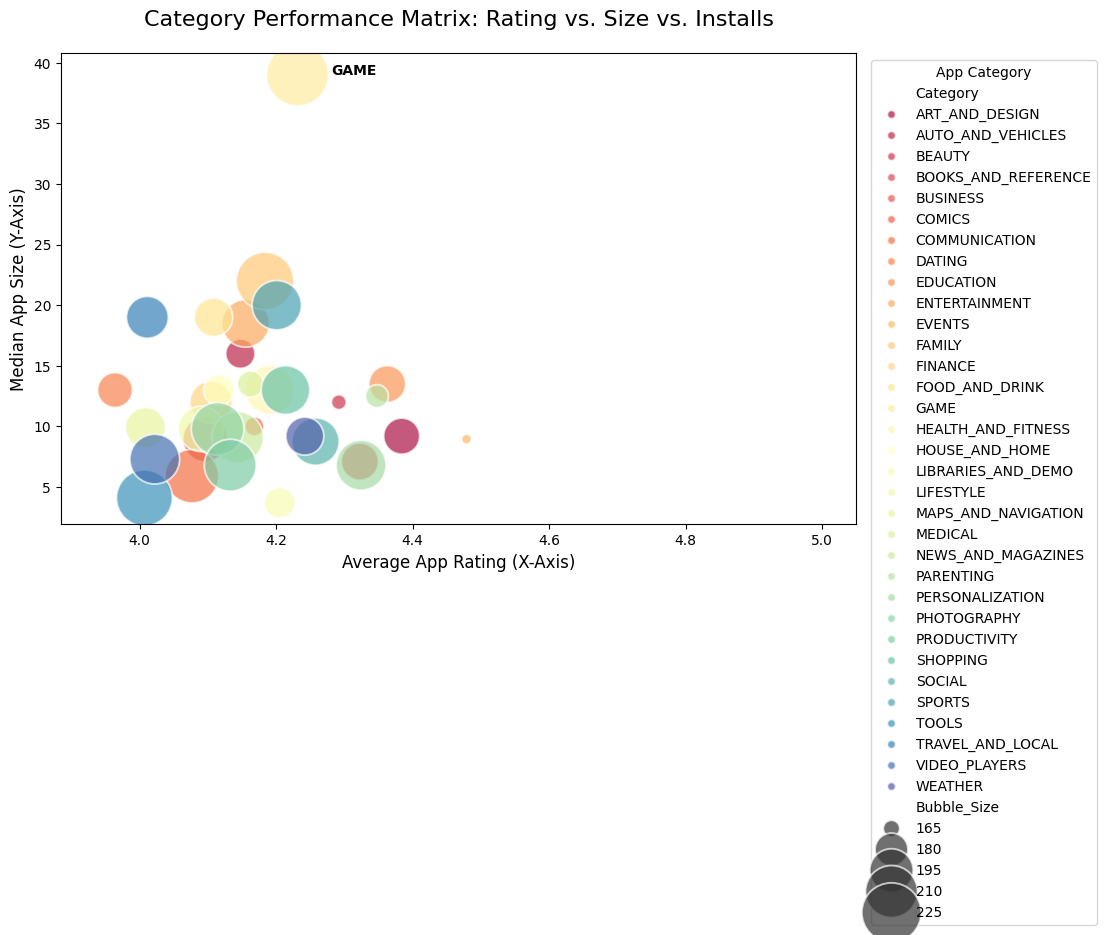

In [ ]:
# 1. Select the core numeric columns and clean data for plotting
plot_data = Apps_df.dropna(subset=['Rating', 'Size', 'Installs', 'Category']).copy()

# 2. Aggregate the data by Category, calculating the key metrics for each bubble:
category_metrics = plot_data.groupby('Category').agg(
    Avg_Rating=('Rating', 'mean'),        # Average Rating for X-axis
    Avg_Size=('Size', 'median'),          # Median Size for Y-axis (use median to handle outliers)
    Total_Installs=('Installs', 'sum'),   # Total Installs for Bubble Size
    App_Count=('App', 'size')             # Count how many apps are in the category (optional)
).reset_index()

# 3. Filter out categories with too few apps (optional, but improves stability)
# If a category only has 1 or 2 apps, the metrics might be misleading.
category_metrics = category_metrics[category_metrics['App_Count'] >= 10].copy()

# 4. Normalize Bubble Size: Log-transform the Installs for plotting size variation
# Bubble size scales better visually when log-transformed.
category_metrics['Bubble_Size'] = np.log1p(category_metrics['Total_Installs']) * 10


# --- Visualization Code: Bubble Chart ---

# Set the size of the chart
plt.figure(figsize=(14, 8))

# Create the Bubble Plot using Seaborn's scatterplot
# Note: Seaborn doesn't have a dedicated 'bubble chart', but 'scatterplot' handles 'size' and 'hue' perfectly.
sns.scatterplot(
    data=category_metrics,
    x='Avg_Rating',
    y='Avg_Size',
    hue='Category',         # Color of the bubble is determined by Category
    size='Bubble_Size',     # Size of the bubble is determined by Total_Installs (log-transformed)
    sizes=(50, 2000),       # Define the min and max visual size of the bubbles
    alpha=0.7,              # Set transparency
    palette='Spectral'
)

# Add Title and Labels
plt.title('Category Performance Matrix: Rating vs. Size vs. Installs', fontsize=16, pad=20)
plt.xlabel('Average App Rating (X-Axis)', fontsize=12)
plt.ylabel('Median App Size (Y-Axis)', fontsize=12)

# Set the X-axis limits to clearly frame the Rating scale (e.g., 3.0 to 5.0)
plt.xlim(category_metrics['Avg_Rating'].min() * 0.98, 5.05)

# Add annotations to key categories (optional, but highly insightful)
# For example, annotate the bubble with the highest installs:
highest_installs = category_metrics.loc[category_metrics['Total_Installs'].idxmax()]
plt.annotate(
    highest_installs['Category'],
    (highest_installs['Avg_Rating'] + 0.05, highest_installs['Avg_Size']),
    fontsize=10,
    fontweight='bold',
    color='black'
)

# Move the legend outside the plot area
plt.legend(title='App Category', bbox_to_anchor=(1.01, 1), loc='upper left')

# Adjust layout for clean display
plt.tight_layout(rect=[0, 0, 0.8, 1]) # Reserve space on the right for the legend

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Used a Bubble Chart to visualize four variables: Rating (X-axis), Size (Y-axis), Installs (Bubble Size), and Category (Color). This is the best chart for finding optimal performance zones across multiple metrics simultaneously.

##### 2. What is/are the insight(s) found from the chart?

GAME is the outlier, having a high median size ($\sim 38 \text{MB}$) and the largest Installs (largest bubble), but its rating ($\sim 4.2$) is average. The highest-rated apps ($\sim 4.4+$) generally have low median sizes ($< 10 \text{MB}$) and moderate install bases (smaller bubbles). Installs are concentrated on the right side of the chart (high ratings), confirming that quality is essential for popularity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The highest value quadrant is high rating ($\geq 4.4$) and moderate size ($\leq 15 \text{MB}$). Developers aiming for high user satisfaction should target this zone.

Negative Impact: There is no single category that is both highest rated and highest installed. This means a developer must choose their primary goal: targeting GAME for huge scale and installs while accepting average ratings, or targeting niche categories for high ratings while accepting lower download volume. Trying to achieve maximum installs and maximum rating simultaneously is statistically difficult.

#### Chart - 20 - World Cloud

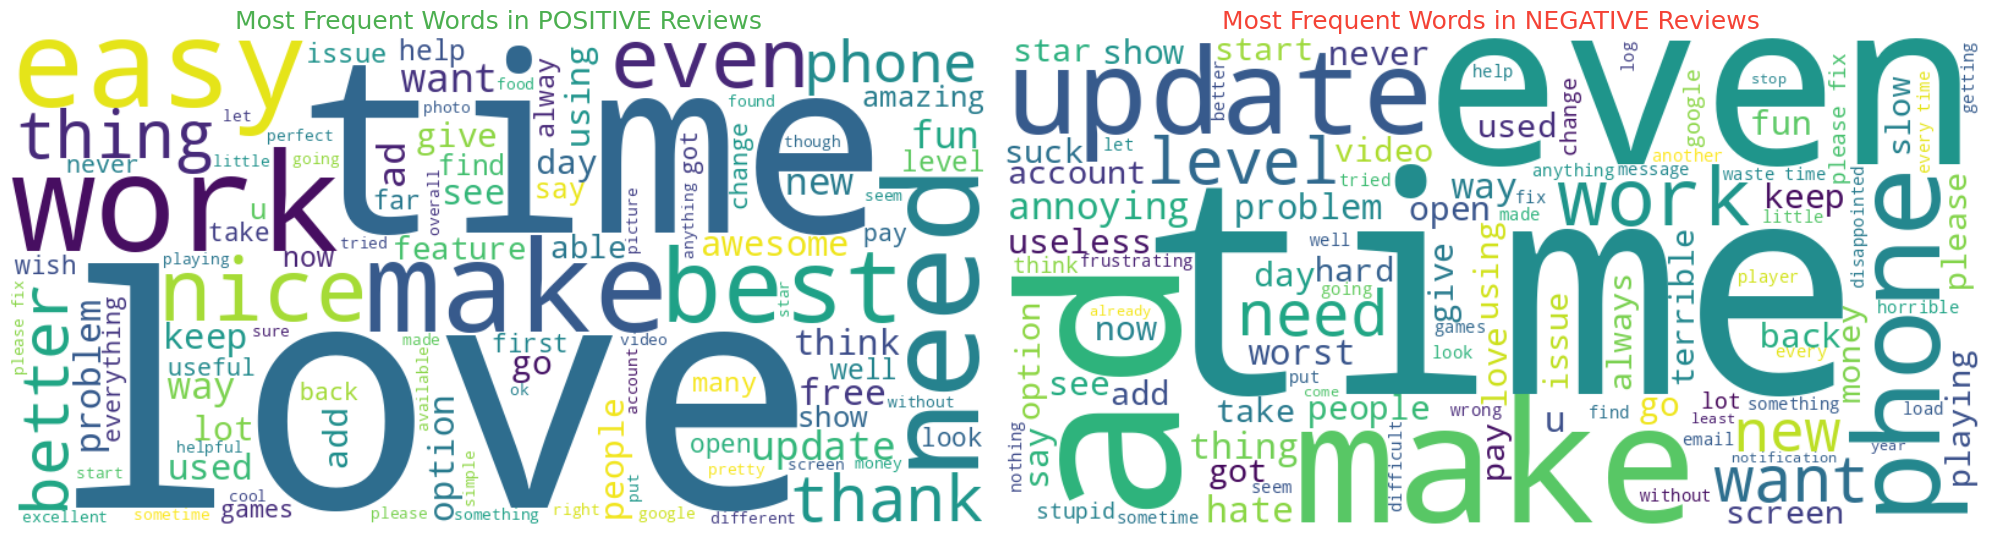

In [ ]:
# --- PRE-REQUISITE: Data Preparation and Text Concatenation ---
from wordcloud import WordCloud, STOPWORDS
# Define custom stopwords relevant to app reviews to improve clarity
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['app', 'game', 'play', 'store', 'would', 'could',
                         'like', 'great', 'good', 'bad', 'one', 'use',
                         'get', 'know', 'really', 'much', 'still', 'try'])

# 1. Filter and concatenate positive reviews into one large string
positive_text = Reviews_df[Reviews_df['Sentiment'] == 'Positive']['Translated_Review'].astype(str).str.lower().str.cat(sep=' ')

# 2. Filter and concatenate negative reviews into one large string
negative_text = Reviews_df[Reviews_df['Sentiment'] == 'Negative']['Translated_Review'].astype(str).str.lower().str.cat(sep=' ')


# --- Visualization Code: Word Clouds ---

# Initialize WordCloud generator with common settings
wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=custom_stopwords,
    min_font_size=10,
    width=800,
    height=400
)

# Set up the figure for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# --- Plot 1: Positive Reviews Word Cloud ---
if positive_text:
    wc.generate(positive_text)
    axes[0].imshow(wc, interpolation='bilinear')
    axes[0].set_title('Most Frequent Words in POSITIVE Reviews', fontsize=18, color='#4CAF50')
    axes[0].axis('off')
else:
    axes[0].text(0.5, 0.5, 'No Positive Reviews Found', ha='center', va='center')


# --- Plot 2: Negative Reviews Word Cloud ---
if negative_text:
    wc.generate(negative_text)
    axes[1].imshow(wc, interpolation='bilinear')
    axes[1].set_title('Most Frequent Words in NEGATIVE Reviews', fontsize=18, color='#F44336')
    axes[1].axis('off')
else:
    axes[1].text(0.5, 0.5, 'No Negative Reviews Found', ha='center', va='center')


# Adjust layout for clean display
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Qualitative Multivariate Analysis. Used a dual Word Cloud to visualize the qualitative content of the Translated_Review text, separated by the Sentiment variable. The size of the word indicates its frequency, directly revealing the drivers of satisfaction and dissatisfaction.

##### 2. What is/are the insight(s) found from the chart?

Positive Drivers: Dominated by highly emotional terms like "love," "best," "awesome," and functional terms like "update" and "work". This confirms user satisfaction is linked to functional utility and high emotional engagement.

Negative Drivers: Dominated by functional complaints like "update," "slow," "time," and strong frustration terms like "terrible," "horrible," "even" (likely used in phrases like "even after update"). The prominence of "need" and "want" suggests missing or desired features.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Developers should ensure functional aspects ("work," "update") are flawless, as these drive positive keywords. Marketing should integrate emotional language like "best" and "awesome".

Negative Impact: The shared frequency of "update" in both clouds indicates high risk. A poor update immediately leads to "slow," "time," and "terrible" complaints (negative growth). The highest priority should be assigned to resolving issues related to speed, fixes, and account management to mitigate negative feedback.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Solution to Achieve Business Objectives**


*  Prioritize the Freemium Model. Purely paid app launches should be avoided due to the overwhelming dominance of free apps ($92.6\%$).
*  Target Minimum Rating of $\mathbf{4.2}$ or higher. The market standard for app quality is high (median $\sim 4.4$). A rating below $4.0$ will significantly reduce organic visibility.


*  Focus on Features Over Size. Develop robust, high-utility apps and do not compromise quality to stay "Small," as larger apps are associated with the highest average installs (demand).
*   Adopt Aggressive Quality Assurance (QA). Dedicate significant resources to fixing issues tied to "slow," "time," and "update" keywords, as these are the primary drivers of negative sentiment and rating degradation.


*   Incentivize User Reviews. Since Installs are highly correlated with Reviews (correlation $\sim 0.47$) and not Rating, encourage users to leave feedback to boost app visibility.
*  Avoid Extreme Pricing. Charging over $\mathbf{\$50}$ is strongly linked to low review volume and limited adoption. Focus on moderate price points ($\$5-\$15$) if selling outright.

*  Focus Monetization in High-Revenue Categories. Implement high-value In-App Purchases (IAP) or subscriptions specifically in the FAMILY, GAME, and LIFESTYLE categories, as these drive the highest consumer spending.
*  Maintain Continuous Development. Given the exponential market growth post-2016, adopt a frequent update schedule (Agile methodology) to remain competitive and avoid stagnation penalties.


*  Leverage Paid Tiers for Stability. Use paid/premium tiers to stabilize user experience, as paid apps show fewer extreme negative sentiment outliers.









# **Conclusion**

The EDA confirms the Play Store is a high-volume, highly competitive market. Success is contingent upon aggressive quality maintenance and strategic market positioning.



1.   Quality is Essential, but Not Sufficient:

*   The market maintains a high quality loor (median rating $\sim 4.4$).
*  Achieving high quality is mandatory, but Rating alone does not drive virality; it is the Reviews that correlate strongly with Installs (popularity).


2.   Prioritize Utility and Features:

*   Functionality (Utility) outweighs File Size. High average installs are associated with larger, feature-rich apps, proving users prioritize content over file constraints.
*   Developers should not compromise features to keep the app artificially "Small.



3.   "Monetization & Risk Mitigation:


*   Freemium is Optimal: The purely Paid model is restrictive, associated with lower review volume and adoption.
*   High revenue is concentrated in FAMILY, GAME, and LIFESTYLE categories.

*   Aggressive QA is crucial: The GAME category carries the highest risk, generating the largest volume of negative sentiment (usually bug/update-related), which must be mitigated instantly.

4. Market Velocity:The market is highly saturated, with exponential growth in app volume post-2016. New entrants must maintain aggressive update schedules to remain visible.






### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***